<pre>
<font color = 'red'><h1><b>2. Baseline Models</b><font>

<pre>
Performing ML & DL models on this NLP problem with 8 different architectures using CNN & LSTM at various layers along with incorporating pre-trained word embedding like GloveVectors and facebook’s FastText.

<pre>
<font color = 'red'><b>Features used in this model :</b><font>
<pre>
pre_comment, pre_stop_comment, c_char, c_punct, c_tokens, c_polarity, c_subjectivity, pre_stop_parent_comment, pre_parent_comment, pc_char, pc_punct, pc_tokens, pc_polarity, pc_subjectivity, score, ups and downs.

In [2]:
import pandas as pd

df = pd.read_parquet('df_new.parquet')
df.head()

label                                            comment  score  ups  \
0      0                                 Rhetorical rheddit      4    4   
1      0         I was dreaming that I was a Snuffleupagus!      3    3   
2      1  Obviously the most well-informed and unbiased ...      0    0   
3      1               Yes..wikipedia will teach it to you.      7    7   
4      0                                            Cheese.      2    2   

   downs                                     parent_comment  \
0      0  Why does the US Government support the use of ...   
1      0  And how much taxpayer money went into the Cook...   
2      0  FTA: Ephraim Sneh, a former member of the Isra...   
3      0  Some redditors need to read the History of the...   
4      0                                    Abstract beauty   

                                         pre_comment  \
0                                 rhetorical rheddit   
1          i was dreaming that i was a snuffleupagus   
2  obviously the most wellinformed and unbiased i...   
3                  yeswikipedia will teach it to you   
4                                             cheese   

                                  pre_parent_comment  \
0  why does the us government support the use of ...   
1  and how much taxpayer money went into the cook...   
2  fta ephraim sneh a former member of the israel...   
3  some redditors need to read the history of the...   
4                                    abstract beauty   

                                    pre_stop_comment  \
0                                 rhetorical rheddit   
1                             dreaming snuffleupagus   
2  obviously wellinformed unbiased individual sta...   
3                             yeswikipedia teach you   
4                                             cheese   

                             pre_stop_parent_comment  c_char  pc_char  \
0  us government support use synthetic thc varian...      18      161   
1  much taxpayer money went cookie monster embigg...      42       95   
2  fta ephraim sneh former member israeli cabinet...      90      166   
3  redditors need read history israelipalestinian...      36      108   
4                                    abstract beauty       7       15   

   c_punct  pc_punct  c_tokens  pc_tokens  c_polarity  c_subjectivity  \
0        0         2         2         31    0.000000        0.000000   
1        1         3         8         15    0.000000        0.000000   
2        2         4        14         30    0.166667        0.466667   
3        3         3         6         16    0.000000        0.000000   
4        1         0         1          2    0.000000        0.000000   

   pc_polarity  pc_subjectivity  
0     0.100000         0.400000  
1     0.250000         0.200000  
2     0.216667         0.366667  
3     0.000000         0.000000  
4     0.000000         0.000000

<pre><font color = 'red'><h1><b>ML models</b><font>

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis = 1), 
                                                    df['label'], 
                                                    test_size    = 0.20, 
                                                    random_state = 42, 
                                                    stratify     = df['label'])

print('X_train :', X_train.shape)
print('X_test  :', X_test.shape)

X_train : (641269, 19)
X_test  : (160318, 19)


<pre>
<font color = 'blue'><b>function to calculate metrics (i.e., accuracy, sensitivity/recall, specificity, precision, f1_score)</b><font>

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix

# method to calculate metrics
def calculate_metrics(y_true, y_pred):
  
    # create a dictionary with all metrics: accuracy, sensitivity (aka recall), specificity, precision and F1 score 
    tp, fn, fp, tn = confusion_matrix(y_true, y_pred).ravel()

    # evaluation(Metrics)
    metrics_dict = {"Accuracy"             : np.round((tp + tn) / (tp + fn + fp + tn), 3),
                    "Sensitivity / Recall" : np.round(tp / (tp + fn), 3), 
                    "Specificity"          : np.round(tn / (tn + fp), 3), 
                    "Precision"            : np.round(tp / (tp + fp), 3), 
                    "F1 Score"             : np.round(2 * ((tp / (tp + fp)) * (tp / (tp + fn))) / ((tp / (tp + fp)) + (tp / (tp + fn))), 3)}
  
    
    return metrics_dict

<pre>
<font color = 'blue'><b>function to plot confusion_matrix</b><font>

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns

def Confusion_Matrix(y_true, y_pred):
    
    cm  =  pd.DataFrame(confusion_matrix(y_true, y_pred), 
                        index = ['Non-Sarcastic','Sarcastic'], 
                        columns = ['Non-Sarcastic','Sarcastic'])
    
    fig = plt.figure(figsize = (7, 5))

    ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
    ax.set_ylabel('True label', fontsize = 14)
    ax.set_xlabel('Predicted label', fontsize = 14)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.tick_params(labelsize = 12)
    plt.show()
    
    return

<pre>
<font color = 'red'><h2><b>Model_1</b><font>

<pre>
Model : Logistic Regression, Pre-trained Embedding : TF-IDF, Pre-processing : with stopwords

<pre>
<font color = 'blue'><b>Text feature : pre_comment</b><font>

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vectorizer = TfidfVectorizer(ngram_range = (1, 2), max_features = 50000, min_df = 2)
Tfidf_vectorizer.fit(X_train['pre_comment'].values)

X_train_c_Tfidf = Tfidf_vectorizer.transform(X_train['pre_comment'].values)
X_test_c_Tfidf  = Tfidf_vectorizer.transform(X_test['pre_comment'].values)

print('X_train :', X_train_c_Tfidf.shape)
print('X_test  :', X_test_c_Tfidf.shape)

X_train : (641269, 50000)
X_test  : (160318, 50000)


<pre>
<font color = 'blue'><b>Numerical comment features : c_char, c_punct, c_tokens, c_polarity, c_subjectivity</b><font>

In [7]:
###############################################[feature : "c_char"]###############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_char'].values.reshape(-1, 1))

# transform
X_train_c_char = Standard_Scaler.transform(X_train['c_char'].values.reshape(-1, 1))
X_test_c_char  = Standard_Scaler.transform(X_test['c_char'].values.reshape(-1, 1))

# shape
print('X_train_c_char         : ', X_train_c_char.shape)
print('X_test_c_char          : ', X_test_c_char.shape)

###############################################[feature : "c_punct"]###############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_punct'].values.reshape(-1, 1))

# transform
X_train_c_punct = Standard_Scaler.transform(X_train['c_punct'].values.reshape(-1, 1))
X_test_c_punct  = Standard_Scaler.transform(X_test['c_punct'].values.reshape(-1, 1))

# shape
print('\nX_train_c_punct        : ', X_train_c_punct.shape)
print('X_test_c_punct         : ', X_test_c_punct.shape)

###############################################[feature : "c_tokens"]##############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_tokens'].values.reshape(-1, 1))

# transform
X_train_c_tokens = Standard_Scaler.transform(X_train['c_tokens'].values.reshape(-1, 1))
X_test_c_tokens  = Standard_Scaler.transform(X_test['c_tokens'].values.reshape(-1, 1))

# shape
print('\nX_train_c_tokens       : ', X_train_c_tokens.shape)
print('X_test_c_tokens        : ', X_test_c_tokens.shape)

###############################################[feature : "c_polarity"]############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_polarity'].values.reshape(-1, 1))

# transform
X_train_c_polarity = Standard_Scaler.transform(X_train['c_polarity'].values.reshape(-1, 1))
X_test_c_polarity  = Standard_Scaler.transform(X_test['c_polarity'].values.reshape(-1, 1))

# shape
print('\nX_train_c_polarity     : ', X_train_c_polarity.shape)
print('X_test_c_polarity      : ', X_test_c_polarity.shape)

############################################[feature : "c_subjectivity"]###########################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_subjectivity'].values.reshape(-1, 1))

# transform
X_train_c_subjectivity = Standard_Scaler.transform(X_train['c_subjectivity'].values.reshape(-1, 1))
X_test_c_subjectivity  = Standard_Scaler.transform(X_test['c_subjectivity'].values.reshape(-1, 1))

# shape
print('\nX_train_c_subjectivity : ', X_train_c_subjectivity.shape)
print('X_test_c_subjectivity  : ', X_test_c_subjectivity.shape)

X_train_c_char         :  (641269, 1)
X_test_c_char          :  (160318, 1)

X_train_c_punct        :  (641269, 1)
X_test_c_punct         :  (160318, 1)

X_train_c_tokens       :  (641269, 1)
X_test_c_tokens        :  (160318, 1)

X_train_c_polarity     :  (641269, 1)
X_test_c_polarity      :  (160318, 1)

X_train_c_subjectivity :  (641269, 1)
X_test_c_subjectivity  :  (160318, 1)


<pre>
<font color = 'blue'><b>Text feature : pre_parent_comment</b><font>

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vectorizer = TfidfVectorizer(ngram_range = (1, 2), max_features = 50000, min_df = 2)
Tfidf_vectorizer.fit(X_train['pre_parent_comment'].values)

X_train_pc_Tfidf = Tfidf_vectorizer.transform(X_train['pre_parent_comment'].values)
X_test_pc_Tfidf = Tfidf_vectorizer.transform(X_test['pre_parent_comment'].values)

print('X_train :', X_train_pc_Tfidf.shape)
print('X_test  :', X_test_pc_Tfidf.shape)

X_train : (641269, 50000)
X_test  : (160318, 50000)


<pre>
<font color = 'blue'><b>Numerical parent_comment features : pc_char, pc_punct, pc_tokens, pc_polarity, pc_subjectivity</b><font>

In [9]:
###############################################[feature : "pc_char"]###############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_char'].values.reshape(-1, 1))

# transform
X_train_pc_char = Standard_Scaler.transform(X_train['pc_char'].values.reshape(-1, 1))
X_test_pc_char  = Standard_Scaler.transform(X_test['pc_char'].values.reshape(-1, 1))

# shape
print('X_train_pc_char         : ', X_train_pc_char.shape)
print('X_test_pc_char          : ', X_test_pc_char.shape)

###############################################[feature : "pc_punct"]###############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_punct'].values.reshape(-1, 1))

# transform
X_train_pc_punct = Standard_Scaler.transform(X_train['pc_punct'].values.reshape(-1, 1))
X_test_pc_punct  = Standard_Scaler.transform(X_test['pc_punct'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_punct        : ', X_train_pc_punct.shape)
print('X_test_pc_punct         : ', X_test_pc_punct.shape)

###############################################[feature : "pc_tokens"]##############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_tokens'].values.reshape(-1, 1))

# transform
X_train_pc_tokens = Standard_Scaler.transform(X_train['pc_tokens'].values.reshape(-1, 1))
X_test_pc_tokens  = Standard_Scaler.transform(X_test['pc_tokens'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_tokens       : ', X_train_pc_tokens.shape)
print('X_test_pc_tokens        : ', X_test_pc_tokens.shape)

###############################################[feature : "pc_polarity"]############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_polarity'].values.reshape(-1, 1))

# transform
X_train_pc_polarity = Standard_Scaler.transform(X_train['pc_polarity'].values.reshape(-1, 1))
X_test_pc_polarity  = Standard_Scaler.transform(X_test['pc_polarity'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_polarity     : ', X_train_pc_polarity.shape)
print('X_test_pc_polarity      : ', X_test_pc_polarity.shape)

############################################[feature : "pc_subjectivity"]###########################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_subjectivity'].values.reshape(-1, 1))

# transform
X_train_pc_subjectivity = Standard_Scaler.transform(X_train['pc_subjectivity'].values.reshape(-1, 1))
X_test_pc_subjectivity  = Standard_Scaler.transform(X_test['pc_subjectivity'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_subjectivity : ', X_train_pc_subjectivity.shape)
print('X_test_pc_subjectivity  : ', X_test_pc_subjectivity.shape)

X_train_pc_char         :  (641269, 1)
X_test_pc_char          :  (160318, 1)

X_train_pc_punct        :  (641269, 1)
X_test_pc_punct         :  (160318, 1)

X_train_pc_tokens       :  (641269, 1)
X_test_pc_tokens        :  (160318, 1)

X_train_pc_polarity     :  (641269, 1)
X_test_pc_polarity      :  (160318, 1)

X_train_pc_subjectivity :  (641269, 1)
X_test_pc_subjectivity  :  (160318, 1)


<pre>
<font color = 'blue'><b>Numerical features : score, ups, downs</b><font>

In [10]:
###############################################[feature : "score"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['score'].values.reshape(-1, 1))

# transform
X_train_score = Standard_Scaler.transform(X_train['score'].values.reshape(-1, 1))
X_test_score  = Standard_Scaler.transform(X_test['score'].values.reshape(-1, 1))

# shape
print('X_train_score : ', X_train_score.shape)
print('X_test_score  : ', X_test_score.shape)

#################################################[feature : "ups"]####################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['ups'].values.reshape(-1, 1))

# transform
X_train_ups = Standard_Scaler.transform(X_train['ups'].values.reshape(-1, 1))
X_test_ups  = Standard_Scaler.transform(X_test['ups'].values.reshape(-1, 1))

# shape
print('\nX_train_ups   : ', X_train_ups.shape)
print('X_test_ups    : ', X_test_ups.shape)

################################################[feature : "downs"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['downs'].values.reshape(-1, 1))

# transform
X_train_downs = Standard_Scaler.transform(X_train['downs'].values.reshape(-1, 1))
X_test_downs  = Standard_Scaler.transform(X_test['downs'].values.reshape(-1, 1))

# shape
print('\nX_train_downs : ', X_train_downs.shape)
print('X_test_downs  : ', X_test_downs.shape)

X_train_score :  (641269, 1)
X_test_score  :  (160318, 1)

X_train_ups   :  (641269, 1)
X_test_ups    :  (160318, 1)

X_train_downs :  (641269, 1)
X_test_downs  :  (160318, 1)


<pre>
<font color = 'blue'><b>Horizontal stacking : pre_comment, c_char, c_punct, c_tokens, c_polarity, c_subjectivity, 
pre_parent_comment, pc_char, pc_punct, pc_tokens, pc_polarity, pc_subjectivity, score, ups, downs</b><font>

In [11]:
from scipy.sparse import hstack

# h_stack
X_train_Tfidf = hstack((X_train_c_Tfidf,
                        X_train_c_char, X_train_c_punct, X_train_c_tokens, X_train_c_polarity, X_train_c_subjectivity, 
                        X_train_pc_Tfidf,
                        X_train_pc_char, X_train_pc_punct, X_train_pc_tokens, X_train_pc_polarity, X_train_pc_subjectivity,
                        X_train_score, X_train_ups, X_train_downs)).tocsr()

X_test_Tfidf = hstack((X_test_c_Tfidf,
                       X_test_c_char, X_test_c_punct, X_test_c_tokens, X_test_c_polarity, X_test_c_subjectivity,
                       X_test_pc_Tfidf,
                       X_test_pc_char, X_test_pc_punct, X_test_pc_tokens, X_test_pc_polarity, X_test_pc_subjectivity,
                       X_test_score, X_test_ups, X_test_downs)).tocsr()

# Shape
print("X_train : ", X_train_Tfidf.shape)
print("X_test  : ", X_test_Tfidf.shape)

X_train :  (641269, 100013)
X_test  :  (160318, 100013)


<pre>
<font color = 'blue'><b>Model : Logistic Regression</b><font>

Accuracy :

Train_accuracy : 0.7794451314502963
Test_accuracy  : 0.7173555059319602

Evaluation :

Train :
{'Accuracy': 0.779, 'Sensitivity / Recall': 0.806, 'Specificity': 0.752, 'Precision': 0.766, 'F1 Score': 0.786}

Test  :
{'Accuracy': 0.717, 'Sensitivity / Recall': 0.746, 'Specificity': 0.688, 'Precision': 0.706, 'F1 Score': 0.726}

Confusion Matrix :



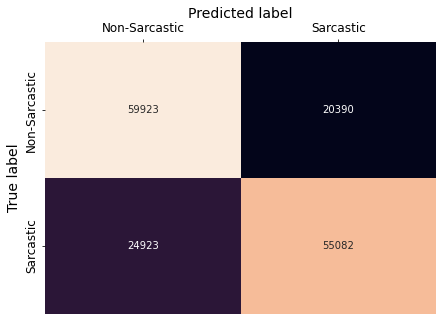

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

# TRAINING
Logistic_Regression = LogisticRegression(C            = 1, 
                                         solver       = 'liblinear',
                                         n_jobs       = -1,  
                                         random_state = 42)
                                         
Logistic_Regression.fit(X_train_Tfidf, y_train)

# ACCURACY
print('Accuracy :\n')

predict_y_train   = Logistic_Regression.predict(X_train_Tfidf)
lr_train_accuracy = accuracy_score(y_train, predict_y_train)
print('Train_accuracy :', lr_train_accuracy)

predict_y_test   = Logistic_Regression.predict(X_test_Tfidf)
lr_test_accuracy = accuracy_score(y_test, predict_y_test)
print('Test_accuracy  :', lr_test_accuracy)

print('='*100)

# EVALUATION
print('\nEvaluation :\n')

print('Train :')
print(calculate_metrics(y_true = y_train, y_pred = predict_y_train))
print('\nTest  :')
print(calculate_metrics(y_true = y_test, y_pred = predict_y_test))

print('='*100)

# CONFUSION MATRIX
print('\nConfusion Matrix :\n')

Confusion_Matrix(y_true = y_test, y_pred = predict_y_test)

<pre>
<font color = 'red'><h2><b>Model_2</b><font>

<pre>
Model : Logistic Regression, Pre-trained Embedding : TF-IDF, Pre-processing : without stopwords

<pre>
<font color = 'blue'><b>Text feature : pre_stop_comment</b><font>

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vectorizer = TfidfVectorizer(ngram_range = (1, 2), max_features = 50000, min_df = 2)
Tfidf_vectorizer.fit(X_train['pre_stop_comment'].values)

X_train_c_stop_Tfidf = Tfidf_vectorizer.transform(X_train['pre_stop_comment'].values)
X_test_c_stop_Tfidf = Tfidf_vectorizer.transform(X_test['pre_stop_comment'].values)

print('X_train_c_stop_Tfidf :', X_train_c_stop_Tfidf.shape)
print('X_test_c_stop_Tfidf  :', X_test_c_stop_Tfidf.shape)

X_train_c_stop_Tfidf : (641269, 50000)
X_test_c_stop_Tfidf  : (160318, 50000)


<pre>
<font color = 'blue'><b>Numerical comment features : c_char, c_punct, c_tokens, c_polarity, c_subjectivity</b><font>
<pre>
Same as previous model

<pre>
<font color = 'blue'><b>Text feature : pre_stop_parent_comment</b><font>

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vectorizer = TfidfVectorizer(ngram_range = (1, 2), max_features = 50000, min_df = 2)
Tfidf_vectorizer.fit(X_train['pre_stop_parent_comment'].values)

X_train_pc_stop_Tfidf = Tfidf_vectorizer.transform(X_train['pre_stop_parent_comment'].values)
X_test_pc_stop_Tfidf = Tfidf_vectorizer.transform(X_test['pre_stop_parent_comment'].values)

print('X_train_pc_stop_Tfidf :', X_train_pc_stop_Tfidf.shape)
print('X_test_pc_stop_Tfidf  :', X_test_pc_stop_Tfidf.shape)

X_train_pc_stop_Tfidf : (641269, 50000)
X_test_pc_stop_Tfidf  : (160318, 50000)


<pre>
<font color = 'blue'><b>Numerical parent_comment features : pc_char, pc_punct, pc_tokens, pc_polarity, pc_subjectivity</b><font>
<pre>
Same as previous model

<pre>
<font color = 'blue'><b>Numerical features : score, ups, downs</b><font>
<pre>
Same as previous model

<pre>
<font color = 'blue'><b>Horizontal stacking : pre_stop_comment, c_char, c_punct, c_tokens, c_polarity, c_subjectivity,
pre_stop_parent_comment, pc_char, pc_punct, pc_tokens, pc_polarity, pc_subjectivity, score, ups, downs</b><font>

In [17]:
from scipy.sparse import hstack

# 
X_train_stop_Tfidf = hstack((X_train_c_stop_Tfidf,
                             X_train_c_char, X_train_c_punct, X_train_c_tokens, X_train_c_polarity, X_train_c_subjectivity, 
                             X_train_pc_stop_Tfidf,
                             X_train_pc_char, X_train_pc_punct, X_train_pc_tokens, X_train_pc_polarity, X_train_pc_subjectivity,
                             X_train_score, X_train_ups, X_train_downs)).tocsr()
#
X_test_stop_Tfidf = hstack((X_test_c_stop_Tfidf,
                            X_test_c_char, X_test_c_punct, X_test_c_tokens, X_test_c_polarity, X_test_c_subjectivity,
                            X_test_pc_stop_Tfidf,
                            X_test_pc_char, X_test_pc_punct, X_test_pc_tokens, X_test_pc_polarity, X_test_pc_subjectivity,
                            X_test_score, X_test_ups, X_test_downs)).tocsr()

# Shape
print("X_train : ", X_train_stop_Tfidf.shape)
print("X_test  : ", X_test_stop_Tfidf.shape)

X_train :  (641269, 100013)
X_test  :  (160318, 100013)


<pre>
<font color = 'blue'><b>Model : Logistic Regression</b><font>

Accuracy :

Train_accuracy : 0.7586363912804143
Test_accuracy  : 0.690714704524757

Evaluation :

Train :
{'Accuracy': 0.759, 'Sensitivity / Recall': 0.788, 'Specificity': 0.729, 'Precision': 0.745, 'F1 Score': 0.766}

Test  :
{'Accuracy': 0.691, 'Sensitivity / Recall': 0.721, 'Specificity': 0.661, 'Precision': 0.681, 'F1 Score': 0.7}

Confusion Matrix :



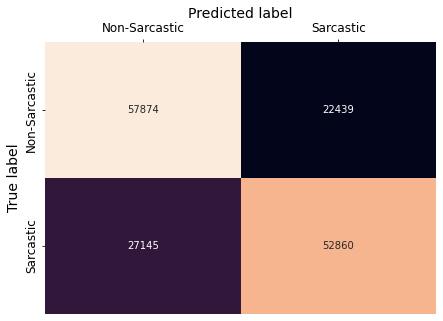

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

# TRAINING
Logistic_Regression = LogisticRegression(C            = 1, 
                                         solver       = 'liblinear',
                                         n_jobs       = -1,  
                                         random_state = 42)
                                         
Logistic_Regression.fit(X_train_stop_Tfidf, y_train)

# ACCURACY
print('Accuracy :\n')

predict_y_train   = Logistic_Regression.predict(X_train_stop_Tfidf)
lr_train_accuracy = accuracy_score(y_train, predict_y_train)
print('Train_accuracy :', lr_train_accuracy)

predict_y_test   = Logistic_Regression.predict(X_test_stop_Tfidf)
lr_test_accuracy = accuracy_score(y_test, predict_y_test)
print('Test_accuracy  :', lr_test_accuracy)

print('='*100)

# EVALUATION
print('\nEvaluation :\n')

print('Train :')
print(calculate_metrics(y_true = y_train, y_pred = predict_y_train))
print('\nTest  :')
print(calculate_metrics(y_true = y_test, y_pred = predict_y_test))

print('='*100)

# CONFUSION MATRIX
print('\nConfusion Matrix :\n')

Confusion_Matrix(y_true = y_test, y_pred = predict_y_test)

<pre><font color = 'red'><h1><b>DL models</b><font>

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.drop('label', axis = 1), 
                                                  df['label'], 
                                                  test_size    = 0.30, 
                                                  random_state = 42, 
                                                  stratify     = df['label'])

X_val, X_test, y_val, y_test = train_test_split(X_val, 
                                                y_val, 
                                                test_size    = 0.50, 
                                                random_state = 42, 
                                                stratify     = y_val)

print('X_train :', X_train.shape)
print('X_val   :', X_val.shape)
print('X_test  :', X_test.shape)

X_train : (561110, 19)
X_val   : (120238, 19)
X_test  : (120239, 19)


<pre><font color = 'blue'><b>compute_class_weight</b><font>

In [6]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# compute_class_weight
class_weights = compute_class_weight(class_weight = 'balanced',
                                     classes      = np.unique(df['label']),
                                     y            = df['label'])

# class_weight_dict
class_weight_dict = dict(enumerate(class_weights))

print('Class_label_weights :')
print('\nSarcastic     :', class_weight_dict[1])
print('Non-Sarcastic :', class_weight_dict[0])

Class_label_weights :

Sarcastic     : 1.0019286439245843
Non-Sarcastic : 0.998078766824798


<pre>
<font color = 'blue'><b>Convolutional Neural Network model</b><font>
<pre>
For "comment" feature,
Conv1D layer 1 consisting of 50 filters and kernel size of 4
MaxPooling1D layer 1 of size 2
Conv1D layer 2 consisting of 100 filters and kernel size of 3
MaxPooling1D layer 2 of size 2

For numerical comment features : c_char, c_punct, c_tokens, c_polarity, c_subjectivity
Dense layer 1 with 256 units

For "parent_comment" feature,
Conv1D layer 1 consisting of 50 filters and kernel size of 4
MaxPooling1D layer 1 of size 2
Conv1D layer 2 consisting of 100 filters and kernel size of 3
MaxPooling1D layer 2 of size 2

For numerical parent_comment features : (pc_char, pc_punct, pc_tokens, pc_polarity, pc_subjectivity),
Dense layer 1 with 256 units

For numerical features : (score, ups, downs),
Dense layer 1 with 256 units

Dropout of 0.2

In [ ]:
 def cnn_model(max_length_1, vocab_size_1, embedding_size_1, embedding_matrix_1, max_length_2, vocab_size_2, embedding_size_2, embedding_matrix_2):

    import tensorflow as tf
    tf.keras.backend.clear_session() # clear up memory / clear up any previous loaded graphs

    ################################################[comment_layer]################################################

    from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten

    # define feature
    input_layer_1 = Input(shape = (max_length_1, ),
                          name  = 'comment')

    c_embedding = Embedding(input_dim    = len(vocab_size_1) + 1,
                            output_dim   = embedding_size_1,
                            weights      = [embedding_matrix_1],
                            input_length = max_length_1,
                            trainable    = False)(input_layer_1)

    conv_1 = Conv1D(filters     = 50, 
                    kernel_size = 4, 
                    activation  = 'relu')(c_embedding)

    max_1 = MaxPooling1D(pool_size = 2)(conv_1)

    conv_2 = Conv1D(filters     = 100, 
                    kernel_size = 3, 
                    activation  = 'relu')(max_1)

    max_2 = MaxPooling1D(pool_size = 2)(conv_2)

    c_flatten = Flatten()(max_2)

    ############################################[numerical_comment_layer]##########################################

    from tensorflow.keras.layers import Input, Dense

    # take score as input
    input_layer_2 = Input(shape = (1, ), name = 'c_char')
    c_char_dense  = Dense(units = 256, activation = 'relu')(input_layer_2)

    # take ups as input
    input_layer_3 = Input(shape = (1, ), name = 'c_punct')
    c_punct_dense = Dense(units = 256, activation = 'relu')(input_layer_3)

    # take downs as input
    input_layer_4  = Input(shape = (1, ), name = 'c_tokens')
    c_tokens_dense = Dense(units = 256, activation = 'relu')(input_layer_4)

    # take downs as input
    input_layer_5    = Input(shape = (1, ), name = 'c_polarity')
    c_polarity_dense = Dense(units = 256, activation = 'relu')(input_layer_5)

    # take downs as input
    input_layer_6        = Input(shape = (1, ), name = 'c_subjectivity')
    c_subjectivity_dense = Dense(units = 256, activation = 'relu')(input_layer_6)

    ################################################[parent_comment_layer]#########################################

    from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten

    # define feature
    input_layer_7 = Input(shape = (max_length_2, ),
                          name  = 'parent_comment')

    pc_embedding = Embedding(input_dim    = len(vocab_size_2) + 1,
                             output_dim   = embedding_size_2,
                             weights      = [embedding_matrix_2],
                             input_length = max_length_2,
                             trainable    = False)(input_layer_7)

    conv_1 = Conv1D(filters     = 50, 
                    kernel_size = 4, 
                    activation  = 'relu')(pc_embedding)

    max_1 = MaxPooling1D(pool_size = 2)(conv_1)

    conv_2 = Conv1D(filters     = 100, 
                    kernel_size = 3, 
                    activation  = 'relu')(max_1)

    max_2 = MaxPooling1D(pool_size = 2)(conv_2)

    pc_flatten = Flatten()(max_2)

    ###########################################[numerical_parent_comment_layer]####################################

    from tensorflow.keras.layers import Input, Dense

    # take score as input
    input_layer_8 = Input(shape = (1, ), name = 'pc_char')
    pc_char_dense = Dense(units = 256, activation = 'relu')(input_layer_8)

    # take ups as input
    input_layer_9  = Input(shape = (1, ), name = 'pc_punct')
    pc_punct_dense = Dense(units = 256, activation = 'relu')(input_layer_9)

    # take downs as input
    input_layer_10  = Input(shape = (1, ), name = 'pc_tokens')
    pc_tokens_dense = Dense(units = 256, activation = 'relu')(input_layer_10)

    # take downs as input
    input_layer_11    = Input(shape = (1, ), name = 'pc_polarity')
    pc_polarity_dense = Dense(units = 256, activation = 'relu')(input_layer_11)

    # take downs as input
    input_layer_12        = Input(shape = (1, ), name = 'pc_subjectivity')
    pc_subjectivity_dense = Dense(units = 256, activation = 'relu')(input_layer_12)

    ###############################################[numerical_layer]###############################################

    from tensorflow.keras.layers import Input, Dense

    #take score as input
    input_layer_13 = Input(shape = (1, ), name = 'score')
    score_dense    = Dense(units = 256, activation = 'relu')(input_layer_13)

    #take ups as input
    input_layer_14 = Input(shape = (1, ), name = 'ups')
    ups_dense      = Dense(units = 256, activation = 'relu')(input_layer_14)

    #take downs as input
    input_layer_15 = Input(shape = (1, ), name = 'downs')
    downs_dense    = Dense(units = 256, activation = 'relu')(input_layer_15)

    #################################################[concatenate]######################################################

    from tensorflow.keras.layers import concatenate

    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.models import Model

    merge = concatenate([c_flatten, 
                        c_char_dense, c_punct_dense, c_tokens_dense, c_polarity_dense, c_subjectivity_dense,
                        pc_flatten, 
                        pc_char_dense, pc_punct_dense, pc_tokens_dense, pc_polarity_dense, pc_subjectivity_dense,
                        score_dense, ups_dense, downs_dense])

    # dropout_layer
    dropout_layer = Dropout(0.2)(merge)

    dense_layer_1 = Dense(units      = 256, 
                          activation = 'relu', 
                          name       = 'fully_connected')(dropout_layer)

    dense_layer_2 = Dense(units      = 128, 
                          activation = 'relu')(dense_layer_1)

    output_layer  = Dense(units      = 1, 
                          activation = 'sigmoid')(dense_layer_2)

    # model
    model = Model(inputs  = [input_layer_1, 
                             input_layer_2, input_layer_3, input_layer_4, input_layer_5, input_layer_6, 
                             input_layer_7,
                             input_layer_8, input_layer_9, input_layer_10, input_layer_11, input_layer_12, 
                             input_layer_13, input_layer_14, input_layer_15],
                  outputs = output_layer)

    return model

<pre>
<font color = 'blue'><b>Long Short Term Memory model</b><font>
<pre>
For "comment" feature,
LSTM layer  consisting of 100 units

For numerical comment features : c_char, c_punct, c_tokens, c_polarity, c_subjectivity
Dense layer 1 with 256 units

For "parent_comment" feature,
LSTM layer  consisting of 100 units

For numerical parent_comment features : (pc_char, pc_punct, pc_tokens, pc_polarity, pc_subjectivity),
Dense layer 1 with 256 units

For numerical features : (score, ups, downs),
Dense layer 1 with 256 units

Dropout of 0.2

In [ ]:
def lstm_model(max_length_1, vocab_size_1, embedding_size_1, embedding_matrix_1, max_length_2, vocab_size_2, embedding_size_2, embedding_matrix_2):

    import tensorflow as tf
    tf.keras.backend.clear_session() # clear up memory / clear up any previous loaded graphs
    
    ################################################[comment_layer]################################################
    
    from tensorflow.keras.layers import Input, Embedding, LSTM, Flatten
    
    # define feature
    input_layer_1 = Input(shape = (max_length_1, ),
                          name  = 'comment')
    
    c_feature = Embedding(input_dim    = len(vocab_size_1) + 1,
                          output_dim   = embedding_size_1,
                          weights      = [embedding_matrix_1],
                          input_length = max_length_1,
                          trainable    = False)(input_layer_1)
    
    c_feature = LSTM(100)(c_feature)
    c_flatten = Flatten()(c_feature)
    
    ############################################[numerical_comment_layer]##########################################

    from tensorflow.keras.layers import Input, Dense

    # take score as input
    input_layer_2 = Input(shape = (1, ), name = 'c_char')
    c_char_dense  = Dense(units = 256, activation = 'relu')(input_layer_2)

    # take ups as input
    input_layer_3 = Input(shape = (1, ), name = 'c_punct')
    c_punct_dense = Dense(units = 256, activation = 'relu')(input_layer_3)

    # take downs as input
    input_layer_4  = Input(shape = (1, ), name = 'c_tokens')
    c_tokens_dense = Dense(units = 256, activation = 'relu')(input_layer_4)

    # take downs as input
    input_layer_5    = Input(shape = (1, ), name = 'c_polarity')
    c_polarity_dense = Dense(units = 256, activation = 'relu')(input_layer_5)

    # take downs as input
    input_layer_6        = Input(shape = (1, ), name = 'c_subjectivity')
    c_subjectivity_dense = Dense(units = 256, activation = 'relu')(input_layer_6)

    ################################################[parent_comment_layer]########################################
    
    from tensorflow.keras.layers import Input, Embedding, LSTM, Flatten
    
    # define feature
    input_layer_7 = Input(shape = (max_length_2, ),
                          name  = 'parent_comment')
    
    pc_feature = Embedding(input_dim    = len(vocab_size_2) + 1,
                           output_dim   = embedding_size_2,
                           weights      = [embedding_matrix_2],
                           input_length = max_length_2,
                           trainable    = False)(input_layer_7)
    
    pc_feature = LSTM(100)(pc_feature)
    pc_flatten = Flatten()(pc_feature)
    
    ###########################################[numerical_parent_comment_layer]####################################

    from tensorflow.keras.layers import Input, Dense

    # take score as input
    input_layer_8 = Input(shape = (1, ), name = 'pc_char')
    pc_char_dense = Dense(units = 256, activation = 'relu')(input_layer_8)

    # take ups as input
    input_layer_9  = Input(shape = (1, ), name = 'pc_punct')
    pc_punct_dense = Dense(units = 256, activation = 'relu')(input_layer_9)

    # take downs as input
    input_layer_10  = Input(shape = (1, ), name = 'pc_tokens')
    pc_tokens_dense = Dense(units = 256, activation = 'relu')(input_layer_10)

    # take downs as input
    input_layer_11    = Input(shape = (1, ), name = 'pc_polarity')
    pc_polarity_dense = Dense(units = 256, activation = 'relu')(input_layer_11)

    # take downs as input
    input_layer_12        = Input(shape = (1, ), name = 'pc_subjectivity')
    pc_subjectivity_dense = Dense(units = 256, activation = 'relu')(input_layer_12)

    ###############################################[numerical_layer]##############################################
    
    from tensorflow.keras.layers import Input, Dense
    
    #take score as input
    input_layer_13 = Input(shape = (1, ), name = 'score')
    score_dense    = Dense(units = 256, activation = 'relu')(input_layer_13)
    
    #take ups as input
    input_layer_14 = Input(shape = (1, ), name = 'ups')
    ups_dense      = Dense(units = 256, activation = 'relu')(input_layer_14)
    
    #take downs as input
    input_layer_15 = Input(shape = (1, ), name = 'downs')
    downs_dense    = Dense(units = 256, activation = 'relu')(input_layer_15)
    
    ###############################################[concatenate]##################################################
    
    from tensorflow.keras.layers import concatenate
    
    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.models import Model
    
    merge = concatenate([c_flatten, 
                         c_char_dense, c_punct_dense, c_tokens_dense, c_polarity_dense, c_subjectivity_dense,
                         pc_flatten, 
                         pc_char_dense, pc_punct_dense, pc_tokens_dense, pc_polarity_dense, pc_subjectivity_dense,
                         score_dense, ups_dense, downs_dense])
    
    # dropout_layer
    dropout_layer = Dropout(0.2)(merge)
    
    dense_layer_1 = Dense(units      = 256, 
                          activation = 'relu', 
                          name       = 'fully_connected')(dropout_layer)
    
    dense_layer_2 = Dense(units      = 128, 
                          activation = 'relu')(dense_layer_1)
    
    output_layer  = Dense(units      = 1, 
                          activation = 'sigmoid')(dense_layer_2)
    # model
    model = Model(inputs  = [input_layer_1, 
                             input_layer_2, input_layer_3, input_layer_4, input_layer_5, input_layer_6, 
                             input_layer_7,
                             input_layer_8, input_layer_9, input_layer_10, input_layer_11, input_layer_12, 
                             input_layer_13, input_layer_14, input_layer_15],
                  outputs = output_layer)

    return model

<pre><font color = 'blue'><b>callbacks</b><font>

In [ ]:
###############################################[EarlyStopping]##################################################

from tensorflow.keras.callbacks import EarlyStopping

# Stop training when a definite metric no longer improves.
Early_Stopping = EarlyStopping(patience             = 5,
                               monitor              = 'val_accuracy',
                               min_delta            = 0.001,
                               restore_best_weights = True)

###############################################[ReduceLROnPlateau]##############################################

from tensorflow.keras.callbacks import ReduceLROnPlateau

# When a specific metric stop improving, decrease the learning rate.
ReduceLR_On_Plateau = ReduceLROnPlateau(monitor  = 'val_accuracy', 
                                        factor   = 0.2,
                                        patience = 5, 
                                        min_lr   = 0.001)

###############################################[LearningRateScheduler]###########################################

from tensorflow.keras.callbacks import LearningRateScheduler

# The learning rate will be modified whenever a new epoch starts (based on a function).
def lr_time_based_decay(epoch, lr):

    epochs = 100
    initial_learning_rate = 0.01
    decay = initial_learning_rate / epochs

    #
    calculate = lr * 1 / (1 + decay * epoch)

    return calculate

Learning_Rate_Scheduler = LearningRateScheduler(lr_time_based_decay, verbose = 1)

#
callbacks_list = [Early_Stopping, ReduceLR_On_Plateau, Learning_Rate_Scheduler]

<pre><font color = 'blue'><b>function to calculate metrics (i.e., precision, recall and f1_score)</b><font>

In [ ]:
from tensorflow.keras import backend as K

###############################################[precision]##############################################

def precision(y_true, y_pred):

    true_positives      = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision           = true_positives / (predicted_positives + K.epsilon())
   
    return precision

################################################[recall]###############################################

def recall(y_true, y_pred):

    true_positives     = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall             = true_positives / (possible_positives + K.epsilon())
   
    return recall

###############################################[f1_score]###############################################

def f1_score(y_true, y_pred):

    precision_ = precision(y_true, y_pred)
    recall_    = recall(y_true, y_pred)
    f1_score   = 2*((precision_ * recall_)/(precision_ + recall_ + K.epsilon()))

    return f1_score

<pre><font color = 'blue'><b>function to plot metircs (i,e., loss, accuracy, precision, recall and f1_score)</b><font>

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

def plot_metric(model_name, history, metric):
    
    plt.figure(figsize = (7, 5))
    sns.set(font_scale = 1.5) 

    train_metrics = history.history[metric]
    test_metrics  = history.history['val_' + metric]
    epochs        = range(1, len(train_metrics) + 1)
    
    sns.lineplot(y      = train_metrics, 
                 x      = epochs,
                 marker = 'o',
                 label  = 'train_'+metric)

    sns.lineplot(y      = test_metrics, 
                 x      = epochs,
                 marker = 'o',
                 label  = 'test_'+metric)

    plt.legend()

    plt.ylabel(metric)
    plt.xlabel('epochs')
    plt.title(model_name + ' model - ' + metric + ' graph')
    plt.show()

<pre>
<font color = 'red'><h2><b>Model_3, Model_4, Model_5 & Model_6</b><font>

<pre><font color = 'blue'><b>Glove Vectors</b><font>

In [33]:
# Glove Vectors link : https://www.kaggle.com/datasets/takuok/glove840b300dtxt

import numpy as np
from tqdm import tqdm

#
embeddings_index = {}

with open('glove.840B.300d.txt', encoding = 'utf-8') as f:
    for line in tqdm(f):
        values = line.split(' ')
        word   = values[0]
        coords = np.asarray(values[1:], dtype = 'float32')
        embeddings_index[word] = coords

print('Found %s word vectors.' % len(embeddings_index))

2196018it [02:02, 17974.13it/s]

Found 2196017 word vectors.


<pre>
<font color = 'red'><h2><b>Model_3</b><font>

<pre>
Model : CNN, Pre-trained Embedding : Glove Vectors, Pre-processing : with stopwords

<pre>
<font color = 'blue'><b>Text features : pre_comment</b><font>

In [34]:
############################################[feature : pre_comment]################################################

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_length
max_length_c = 40

# tokenizer
tokenizer_c = Tokenizer(num_words = 50000, oov_token = '<unk>')

# fit has to happen only on train data
tokenizer_c.fit_on_texts(X_train['pre_comment'].values)

# texts_to_sequences
X_train_c_sequences = tokenizer_c.texts_to_sequences(X_train['pre_comment'].values)
X_train_c_padding   = pad_sequences(X_train_c_sequences, maxlen = max_length_c)

X_val_c_sequences   = tokenizer_c.texts_to_sequences(X_val['pre_comment'].values)
X_val_c_padding     = pad_sequences(X_val_c_sequences, maxlen = max_length_c)

X_test_c_sequences  = tokenizer_c.texts_to_sequences(X_test['pre_comment'].values)
X_test_c_padding    = pad_sequences(X_test_c_sequences, maxlen = max_length_c)


# shape
print('After_padding :')
print('\nX_train : ', X_train_c_padding.shape)
print('X_val   : ', X_val_c_padding.shape)
print('X_test  : ', X_test_c_padding.shape)
print()
print('='* 110)

#
vocab_size_c = tokenizer_c.word_index
print('\nVocab_size "comment" :', len(vocab_size_c))

###############################################[embedding_matrix]###################################################
#
embedding_size_c = 300

# create a weight matrix for words in training docs
embedding_matrix_c = np.zeros((len(vocab_size_c) + 1, embedding_size_c))

for word, i in tokenizer_c.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_c[i] = embedding_vector

print('\nEmbedding_matrix_shape :', embedding_matrix_c.shape)

After_padding :

X_train :  (561110, 40)
X_val   :  (120238, 40)
X_test  :  (120239, 40)


Vocab_size "comment" : 135105

Embedding_matrix_shape : (135106, 300)


<pre>
<font color = 'blue'><b>Numerical comment features : c_char, c_punct, c_tokens, c_polarity, c_subjectivity</b><font>

In [21]:
###########################################[feature : "c_char"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_char'].values.reshape(-1, 1))

# transform
X_train_c_char = Standard_Scaler.transform(X_train['c_char'].values.reshape(-1, 1))
X_val_c_char   = Standard_Scaler.transform(X_val['c_char'].values.reshape(-1, 1))
X_test_c_char  = Standard_Scaler.transform(X_test['c_char'].values.reshape(-1, 1))

# shape
print('X_train_c_char         : ', X_train_c_char.shape)
print('X_val_c_char           : ', X_val_c_char.shape)
print('X_test_c_char          : ', X_test_c_char.shape)

##########################################[feature : "c_punct"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_punct'].values.reshape(-1, 1))

# transform
X_train_c_punct = Standard_Scaler.transform(X_train['c_punct'].values.reshape(-1, 1))
X_val_c_punct   = Standard_Scaler.transform(X_val['c_punct'].values.reshape(-1, 1))
X_test_c_punct  = Standard_Scaler.transform(X_test['c_punct'].values.reshape(-1, 1))

# shape
print('\nX_train_c_punct        : ', X_train_c_punct.shape)
print('X_val_c_punct          : ', X_val_c_punct.shape)
print('X_test_c_punct         : ', X_test_c_punct.shape)

#########################################[feature : "c_tokens"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_tokens'].values.reshape(-1, 1))

# transform
X_train_c_tokens = Standard_Scaler.transform(X_train['c_tokens'].values.reshape(-1, 1))
X_val_c_tokens   = Standard_Scaler.transform(X_val['c_tokens'].values.reshape(-1, 1))
X_test_c_tokens  = Standard_Scaler.transform(X_test['c_tokens'].values.reshape(-1, 1))

# shape
print('\nX_train_c_tokens       : ', X_train_c_tokens.shape)
print('X_val_c_tokens         : ', X_val_c_tokens.shape)
print('X_test_c_tokens        : ', X_test_c_tokens.shape)

#######################################[feature : "c_polarity"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_polarity'].values.reshape(-1, 1))

# transform
X_train_c_polarity = Standard_Scaler.transform(X_train['c_polarity'].values.reshape(-1, 1))
X_val_c_polarity   = Standard_Scaler.transform(X_val['c_polarity'].values.reshape(-1, 1))
X_test_c_polarity  = Standard_Scaler.transform(X_test['c_polarity'].values.reshape(-1, 1))

# shape
print('\nX_train_c_polarity     : ', X_train_c_polarity.shape)
print('X_val_c_polarity       : ', X_val_c_polarity.shape)
print('X_test_c_polarity      : ', X_test_c_polarity.shape)

###################################[feature : "c_subjectivity"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_subjectivity'].values.reshape(-1, 1))

# transform
X_train_c_subjectivity = Standard_Scaler.transform(X_train['c_subjectivity'].values.reshape(-1, 1))
X_val_c_subjectivity   = Standard_Scaler.transform(X_val['c_subjectivity'].values.reshape(-1, 1))
X_test_c_subjectivity  = Standard_Scaler.transform(X_test['c_subjectivity'].values.reshape(-1, 1))

# shape
print('\nX_train_c_subjectivity : ', X_train_c_subjectivity.shape)
print('X_val_c_subjectivity   : ', X_val_c_subjectivity.shape)
print('X_test_c_subjectivity  : ', X_test_c_subjectivity.shape)

X_train_c_char         :  (561110, 1)
X_val_c_char           :  (120238, 1)
X_test_c_char          :  (120239, 1)

X_train_c_punct        :  (561110, 1)
X_val_c_punct          :  (120238, 1)
X_test_c_punct         :  (120239, 1)

X_train_c_tokens       :  (561110, 1)
X_val_c_tokens         :  (120238, 1)
X_test_c_tokens        :  (120239, 1)

X_train_c_polarity     :  (561110, 1)
X_val_c_polarity       :  (120238, 1)
X_test_c_polarity      :  (120239, 1)

X_train_c_subjectivity :  (561110, 1)
X_val_c_subjectivity   :  (120238, 1)
X_test_c_subjectivity  :  (120239, 1)


<pre>
<font color = 'blue'><b>Text features : pre_parent_comment</b><font>

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_length
max_length_pc = 150

# tokenizer
tokenizer_pc = Tokenizer(num_words = 50000, oov_token = '<unk>')

# fit has to happen only on train data
tokenizer_pc.fit_on_texts(X_train['pre_parent_comment'].values)

# texts_to_sequences
X_train_pc_sequences = tokenizer_pc.texts_to_sequences(X_train['pre_parent_comment'].values)
X_train_pc_padding   = pad_sequences(X_train_pc_sequences, maxlen = max_length_pc)

X_val_pc_sequences   = tokenizer_pc.texts_to_sequences(X_val['pre_parent_comment'].values)
X_val_pc_padding     = pad_sequences(X_val_pc_sequences, maxlen = max_length_pc)

X_test_pc_sequences  = tokenizer_pc.texts_to_sequences(X_test['pre_parent_comment'].values)
X_test_pc_padding    = pad_sequences(X_test_pc_sequences, maxlen = max_length_pc)


# shape
print('After_padding :')
print('\nX_train : ', X_train_pc_padding.shape)
print('X_val   : ', X_val_pc_padding.shape)
print('X_test  : ', X_test_pc_padding.shape)
print()
print('='* 110)

#
vocab_size_pc = tokenizer_pc.word_index
print('\nVocab_size "parent_comment" :', len(vocab_size_pc))

###############################################[embedding_matrix]###################################################

#
embedding_size_pc = 300

# create a weight matrix for words in training docs
embedding_matrix_pc = np.zeros((len(vocab_size_pc) + 1, 300))

for word, i in tokenizer_pc.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_pc[i] = embedding_vector

print('\nEmbedding_matrix_shape :', embedding_matrix_pc.shape)

After_padding :

X_train :  (561110, 150)
X_val   :  (120238, 150)
X_test  :  (120239, 150)


Vocab_size "parent_comment" : 199914

Embedding_matrix_shape : (199915, 300)


<pre>
<font color = 'blue'><b>Numerical parent_comment features : pc_char, pc_punct, pc_tokens, pc_polarity, pc_subjectivity</b><font>

In [22]:
###########################################[feature : "pc_char"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_char'].values.reshape(-1, 1))

# transform
X_train_pc_char = Standard_Scaler.transform(X_train['pc_char'].values.reshape(-1, 1))
X_val_pc_char   = Standard_Scaler.transform(X_val['pc_char'].values.reshape(-1, 1))
X_test_pc_char  = Standard_Scaler.transform(X_test['pc_char'].values.reshape(-1, 1))

# shape
print('X_train_pc_char         : ', X_train_pc_char.shape)
print('X_val_pc_char           : ', X_val_pc_char.shape)
print('X_test_pc_char          : ', X_test_pc_char.shape)

##########################################[feature : "pc_punct"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_punct'].values.reshape(-1, 1))

# transform
X_train_pc_punct = Standard_Scaler.transform(X_train['pc_punct'].values.reshape(-1, 1))
X_val_pc_punct   = Standard_Scaler.transform(X_val['pc_punct'].values.reshape(-1, 1))
X_test_pc_punct  = Standard_Scaler.transform(X_test['pc_punct'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_punct        : ', X_train_pc_punct.shape)
print('X_val_pc_punct          : ', X_val_pc_punct.shape)
print('X_test_pc_punct         : ', X_test_pc_punct.shape)

#########################################[feature : "pc_tokens"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_tokens'].values.reshape(-1, 1))

# transform
X_train_pc_tokens = Standard_Scaler.transform(X_train['pc_tokens'].values.reshape(-1, 1))
X_val_pc_tokens   = Standard_Scaler.transform(X_val['pc_tokens'].values.reshape(-1, 1))
X_test_pc_tokens  = Standard_Scaler.transform(X_test['pc_tokens'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_tokens       : ', X_train_pc_tokens.shape)
print('X_val_pc_tokens         : ', X_val_pc_tokens.shape)
print('X_test_pc_tokens        : ', X_test_pc_tokens.shape)

#######################################[feature : "pc_polarity"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_polarity'].values.reshape(-1, 1))

# transform
X_train_pc_polarity = Standard_Scaler.transform(X_train['pc_polarity'].values.reshape(-1, 1))
X_val_pc_polarity   = Standard_Scaler.transform(X_val['pc_polarity'].values.reshape(-1, 1))
X_test_pc_polarity  = Standard_Scaler.transform(X_test['pc_polarity'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_polarity     : ', X_train_pc_polarity.shape)
print('X_val_pc_polarity       : ', X_val_pc_polarity.shape)
print('X_test_pc_polarity      : ', X_test_pc_polarity.shape)

###################################[feature : "pc_subjectivity"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_subjectivity'].values.reshape(-1, 1))

# transform
X_train_pc_subjectivity = Standard_Scaler.transform(X_train['pc_subjectivity'].values.reshape(-1, 1))
X_val_pc_subjectivity   = Standard_Scaler.transform(X_val['pc_subjectivity'].values.reshape(-1, 1))
X_test_pc_subjectivity  = Standard_Scaler.transform(X_test['pc_subjectivity'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_subjectivity : ', X_train_pc_subjectivity.shape)
print('X_val_pc_subjectivity   : ', X_val_pc_subjectivity.shape)
print('X_test_pc_subjectivity  : ', X_test_pc_subjectivity.shape)

X_train_pc_char         :  (561110, 1)
X_val_pc_char           :  (120238, 1)
X_test_pc_char          :  (120239, 1)

X_train_pc_punct        :  (561110, 1)
X_val_pc_punct          :  (120238, 1)
X_test_pc_punct         :  (120239, 1)

X_train_pc_tokens       :  (561110, 1)
X_val_pc_tokens         :  (120238, 1)
X_test_pc_tokens        :  (120239, 1)

X_train_pc_polarity     :  (561110, 1)
X_val_pc_polarity       :  (120238, 1)
X_test_pc_polarity      :  (120239, 1)

X_train_pc_subjectivity :  (561110, 1)
X_val_pc_subjectivity   :  (120238, 1)
X_test_pc_subjectivity  :  (120239, 1)


<pre>
<font color = 'blue'><b>Numerical features : score, ups, downs</b><font>

In [11]:
########################################[feature : "score"]#############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['score'].values.reshape(-1, 1))

# transform
X_train_score = Standard_Scaler.transform(X_train['score'].values.reshape(-1, 1))
X_val_score   = Standard_Scaler.transform(X_val['score'].values.reshape(-1, 1))
X_test_score  = Standard_Scaler.transform(X_test['score'].values.reshape(-1, 1))

# shape
print('X_train_score : ', X_train_score.shape)
print('X_val_score   : ', X_val_score.shape)
print('X_test_score  : ', X_test_score.shape)

########################################[feature : "ups"]##############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['ups'].values.reshape(-1, 1))

# transform
X_train_ups = Standard_Scaler.transform(X_train['ups'].values.reshape(-1, 1))
X_val_ups   = Standard_Scaler.transform(X_val['ups'].values.reshape(-1, 1))
X_test_ups  = Standard_Scaler.transform(X_test['ups'].values.reshape(-1, 1))

# shape
print('\nX_train_ups   : ', X_train_ups.shape)
print('X_val_ups     : ', X_val_ups.shape)
print('X_test_ups    : ', X_test_ups.shape)

########################################[feature : "downs"]#############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['downs'].values.reshape(-1, 1))

# transform
X_train_downs = Standard_Scaler.transform(X_train['downs'].values.reshape(-1, 1))
X_val_downs   = Standard_Scaler.transform(X_val['downs'].values.reshape(-1, 1))
X_test_downs  = Standard_Scaler.transform(X_test['downs'].values.reshape(-1, 1))

# shape
print('\nX_train_downs : ', X_train_downs.shape)
print('X_val_downs   : ', X_val_downs.shape)
print('X_test_downs  : ', X_test_downs.shape)

X_train_score :  (561110, 1)
X_val_score   :  (120238, 1)
X_test_score  :  (120239, 1)

X_train_ups   :  (561110, 1)
X_val_ups     :  (120238, 1)
X_test_ups    :  (120239, 1)

X_train_downs :  (561110, 1)
X_val_downs   :  (120238, 1)
X_test_downs  :  (120239, 1)


<pre>
<font color = 'blue'><b>Model : Convolutional Neural Network</b><font>

In [37]:
Model_1 = cnn_model(max_length_1 = max_length_c, vocab_size_1 = vocab_size_c, embedding_size_1 = embedding_size_c, embedding_matrix_1 = embedding_matrix_c, 
                    max_length_2 = max_length_pc, vocab_size_2 = vocab_size_pc, embedding_size_2 = embedding_size_pc, embedding_matrix_2 = embedding_matrix_pc)

In [38]:
Model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comment (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 parent_comment (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 300)      40531800    ['comment[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 150, 300)     59974500    ['parent_comment[0][0]']         
                                                                                              

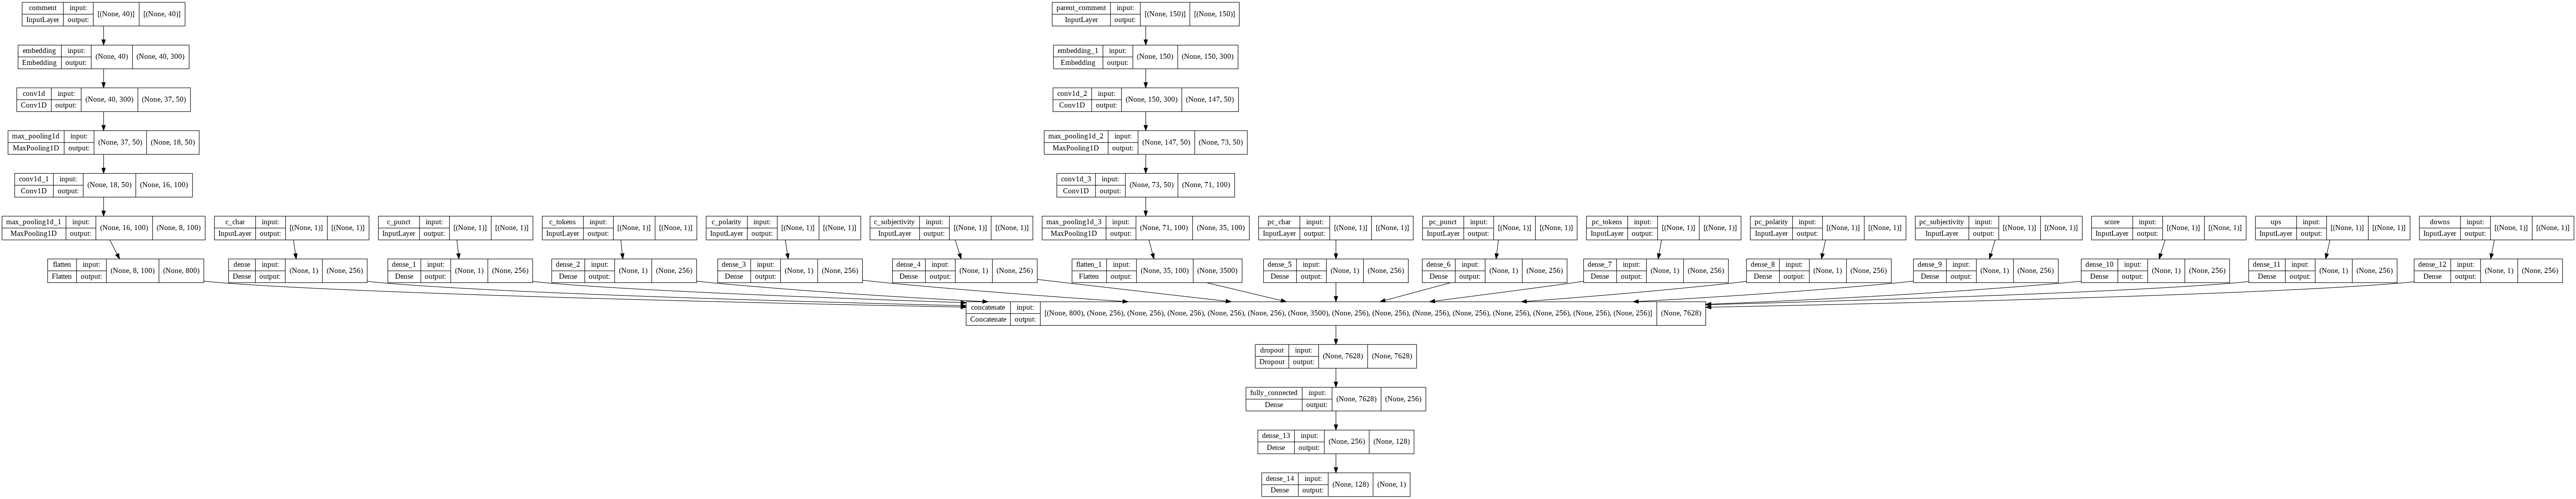

In [39]:
from tensorflow.keras.utils import plot_model

plot_model(Model_1,
           to_file = 'Model_1.png',
           show_shapes = True)

In [40]:
from tensorflow.keras.optimizers import Adam

Model_1.compile(optimizer = Adam(),
                loss      = 'binary_crossentropy',
                metrics   = ['accuracy', precision, recall, f1_score])

In [41]:
X_train_data = [X_train_c_padding, 
                X_train_c_char, X_train_c_punct, X_train_c_tokens, X_train_c_polarity, X_train_c_subjectivity,
                X_train_pc_padding, 
                X_train_pc_char, X_train_pc_punct, X_train_pc_tokens, X_train_pc_polarity, X_train_pc_subjectivity,
                X_train_score, X_train_ups, X_train_downs]

X_val_data   = [X_val_c_padding, 
                X_val_c_char, X_val_c_punct, X_val_c_tokens, X_val_c_polarity, X_val_c_subjectivity,
                X_val_pc_padding, 
                X_val_pc_char, X_val_pc_punct, X_val_pc_tokens, X_val_pc_polarity, X_val_pc_subjectivity,
                X_val_score, X_val_ups, X_val_downs]

X_test_data  = [X_test_c_padding, 
                X_test_c_char, X_test_c_punct, X_test_c_tokens, X_test_c_polarity, X_test_c_subjectivity,
                X_test_pc_padding, 
                X_test_pc_char, X_test_pc_punct, X_test_pc_tokens, X_test_pc_polarity, X_test_pc_subjectivity,
                X_test_score, X_test_ups, X_test_downs]

In [42]:
history_1 = Model_1.fit(x               = X_train_data, 
                        y               = y_train, 
                        batch_size      = 1024, 
                        epochs          = 50, 
                        validation_data = (X_val_data,
                                           y_val), 
                        class_weight    = class_weight_dict,
                        callbacks       = callbacks_list) 


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
548/548 [==============================] - 50s 66ms/step - loss: 0.5952 - accuracy: 0.6749 - precision: 0.6984 - recall: 0.6249 - f1_score: 0.6562 - val_loss: 0.5713 - val_accuracy: 0.6975 - val_precision: 0.7318 - val_recall: 0.6216 - val_f1_score: 0.6720 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999000574917021.
Epoch 2/50
548/548 [==============================] - 35s 64ms/step - loss: 0.5610 - accuracy: 0.7066 - precision: 0.7321 - recall: 0.6535 - f1_score: 0.6890 - val_loss: 0.5590 - val_accuracy: 0.7069 - val_precision: 0.7306 - val_recall: 0.6536 - val_f1_score: 0.6897 - lr: 9.9990e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000999700106714659.
Epoch 3/50
548/548 [==============================] - 35s 65ms/step - loss: 0.5454 - accuracy: 0.7187 - precision: 0.7435 - recall: 0.6697 - f1_score: 0.7031 - val_loss: 0.5575 - val_accuracy: 0.

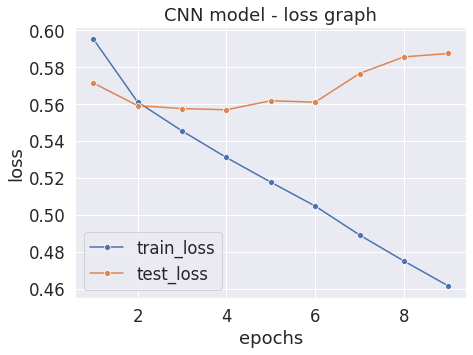

In [43]:
plot_metric(model_name = 'CNN', history = history_1, metric = 'loss')

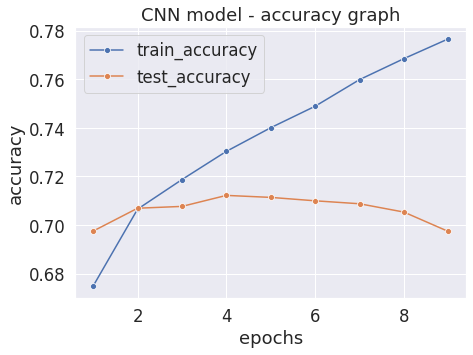

In [44]:
plot_metric(model_name = 'CNN', history = history_1, metric = 'accuracy')

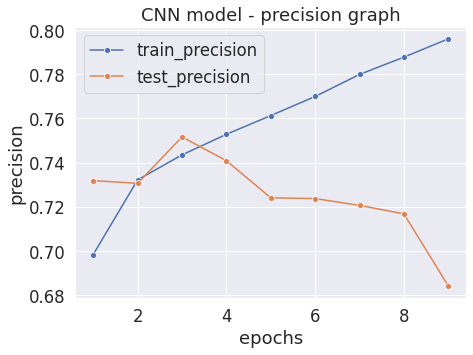

In [45]:
plot_metric(model_name = 'CNN', history = history_1, metric = 'precision')

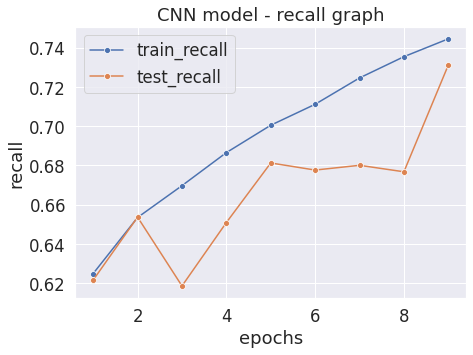

In [46]:
plot_metric(model_name = 'CNN', history = history_1, metric = 'recall')

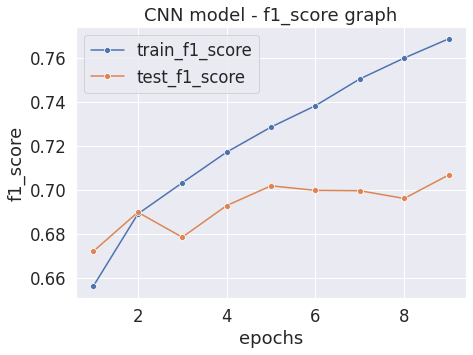

In [47]:
plot_metric(model_name = 'CNN', history = history_1, metric = 'f1_score')

In [48]:
'''save_weights'''

Model_1.save_weights('/content/drive/MyDrive/Model_9_weights.hdf5')

In [49]:
'''load_weights'''

Model_1.load_weights('/content/drive/MyDrive/Model_9_weights.hdf5')

In [50]:
l, a, p, r, f = Model_1.evaluate(X_train_data, y_train)

17535/17535 [==============================] - 108s 6ms/step - loss: 0.5059 - accuracy: 0.7498 - precision: 0.7815 - recall: 0.6921 - f1_score: 0.7274


In [51]:
l, a, p, r, f = Model_1.evaluate(X_val_data, y_val)

3758/3758 [==============================] - 22s 6ms/step - loss: 0.5568 - accuracy: 0.7122 - precision: 0.7407 - recall: 0.6508 - f1_score: 0.6858


In [52]:
l, a, p, r, f = Model_1.evaluate(X_test_data, y_test)

3758/3758 [==============================] - 22s 6ms/step - loss: 0.5593 - accuracy: 0.7099 - precision: 0.7379 - recall: 0.6494 - f1_score: 0.6833


In [54]:
# predicted value
y_pred  = Model_1.predict(X_test_data, verbose = 1)
y_pred  = np.where(y_pred > 0.5, 1, 0)
y_pred  = np.array(y_pred, dtype = int).tolist()

# true value
y_true  = y_test.tolist()

3758/3758 [==============================] - 22s 6ms/step


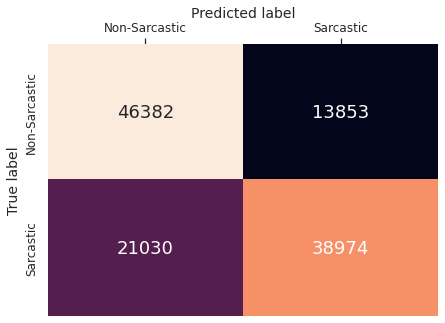

In [55]:
from sklearn.metrics import confusion_matrix

cm =  pd.DataFrame(confusion_matrix(y_true, y_pred), index = ['Non-Sarcastic','Sarcastic'], columns = ['Non-Sarcastic','Sarcastic'])
fig = plt.figure(figsize = (7, 5))

ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
ax.set_ylabel('True label', fontsize = 14)
ax.set_xlabel('Predicted label', fontsize = 14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize = 12)
plt.show()

<pre>
<font color = 'red'><h2><b>Model_4</b><font>

<pre>
Model : LSTM, Pre-trained Embedding : Glove Vectors, Pre-processing : with stopwords

<pre>
<font color = 'blue'><b>Text & Numerical features :</b><font>
<pre>
Same as previous model

<pre>
<font color = 'blue'><b>Model : Long Short Term Memory</b><font>

In [57]:
Model_2 = lstm_model(max_length_1 = max_length_c, vocab_size_1 = vocab_size_c, embedding_size_1 = embedding_size_c, embedding_matrix_1 = embedding_matrix_c, 
                     max_length_2 = max_length_pc, vocab_size_2 = vocab_size_pc, embedding_size_2 = embedding_size_pc, embedding_matrix_2 = embedding_matrix_pc)

In [58]:
Model_2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comment (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 parent_comment (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 300)      40531800    ['comment[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 150, 300)     59974500    ['parent_comment[0][0]']         
                                                                                              

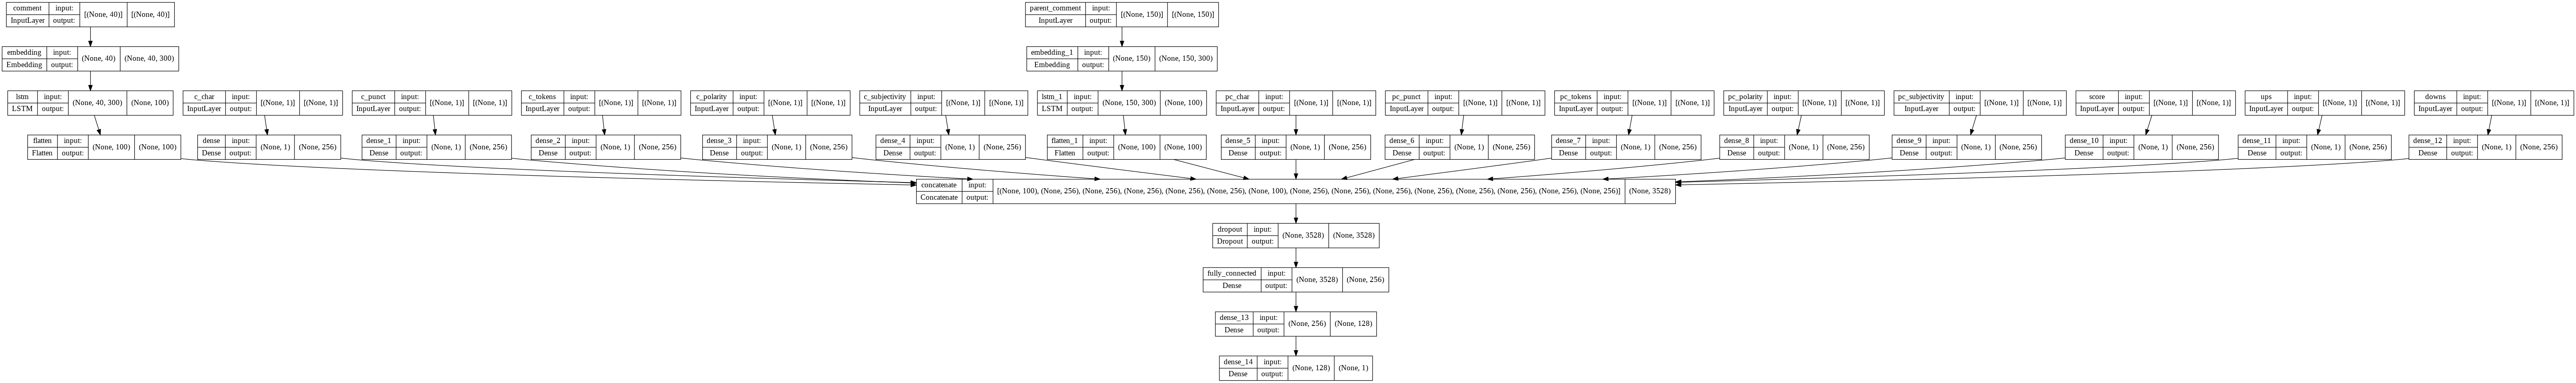

In [59]:
from tensorflow.keras.utils import plot_model

plot_model(Model_2,
           to_file = 'Model_2.png',
           show_shapes = True)

In [60]:
from tensorflow.keras.optimizers import Adam

Model_2.compile(optimizer = Adam(),
                loss      = 'binary_crossentropy',
                metrics   = ['accuracy', precision, recall, f1_score])

In [61]:
X_train_data = [X_train_c_padding, 
                X_train_c_char, X_train_c_punct, X_train_c_tokens, X_train_c_polarity, X_train_c_subjectivity,
                X_train_pc_padding, 
                X_train_pc_char, X_train_pc_punct, X_train_pc_tokens, X_train_pc_polarity, X_train_pc_subjectivity,
                X_train_score, X_train_ups, X_train_downs]

X_val_data = [X_val_c_padding, 
              X_val_c_char, X_val_c_punct, X_val_c_tokens, X_val_c_polarity, X_val_c_subjectivity,
              X_val_pc_padding, 
              X_val_pc_char, X_val_pc_punct, X_val_pc_tokens, X_val_pc_polarity, X_val_pc_subjectivity,
              X_val_score, X_val_ups, X_val_downs]

X_test_data = [X_test_c_padding, 
               X_test_c_char, X_test_c_punct, X_test_c_tokens, X_test_c_polarity, X_test_c_subjectivity,
               X_test_pc_padding, 
               X_test_pc_char, X_test_pc_punct, X_test_pc_tokens, X_test_pc_polarity, X_test_pc_subjectivity,
               X_test_score, X_test_ups, X_test_downs]

In [62]:
history_2 = Model_2.fit(x               = X_train_data, 
                        y               = y_train, 
                        batch_size      = 1024, 
                        epochs          = 50, 
                        validation_data = (X_val_data,
                                           y_val), 
                        class_weight    = class_weight_dict,
                        callbacks       = callbacks_list)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
548/548 [==============================] - 61s 102ms/step - loss: 0.5879 - accuracy: 0.6825 - precision: 0.6977 - recall: 0.6504 - f1_score: 0.6701 - val_loss: 0.5595 - val_accuracy: 0.7069 - val_precision: 0.7634 - val_recall: 0.5983 - val_f1_score: 0.6706 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999000574917021.
Epoch 2/50
548/548 [==============================] - 53s 97ms/step - loss: 0.5449 - accuracy: 0.7197 - precision: 0.7391 - recall: 0.6807 - f1_score: 0.7073 - val_loss: 0.5387 - val_accuracy: 0.7231 - val_precision: 0.7587 - val_recall: 0.6527 - val_f1_score: 0.7014 - lr: 9.9990e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000999700106714659.
Epoch 3/50
548/548 [==============================] - 53s 97ms/step - loss: 0.5263 - accuracy: 0.7333 - precision: 0.7520 - recall: 0.6969 - f1_score: 0.7224 - val_loss: 0.5321 - val_accuracy: 0

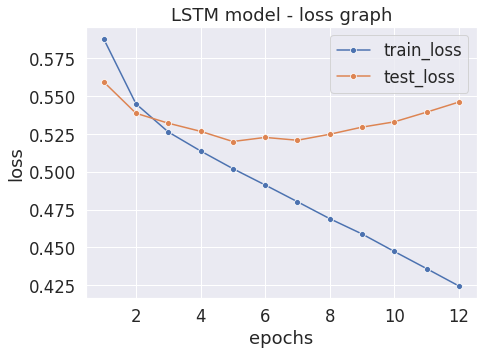

In [63]:
plot_metric(model_name = 'LSTM', history = history_2, metric = 'loss')

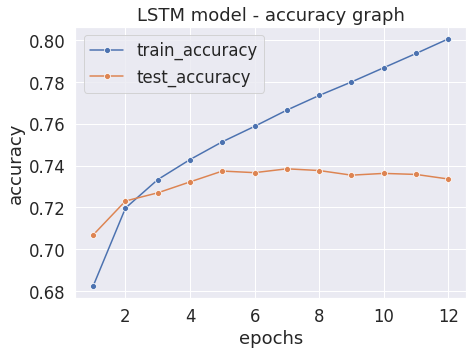

In [64]:
plot_metric(model_name = 'LSTM', history = history_2, metric = 'accuracy')

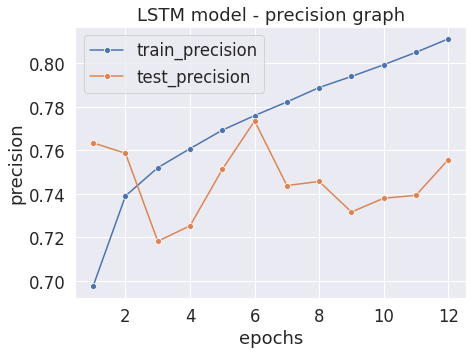

In [65]:
plot_metric(model_name = 'LSTM', history = history_2, metric = 'precision')

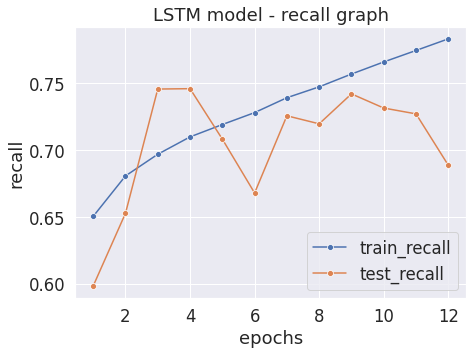

In [66]:
plot_metric(model_name = 'LSTM', history = history_2, metric = 'recall')

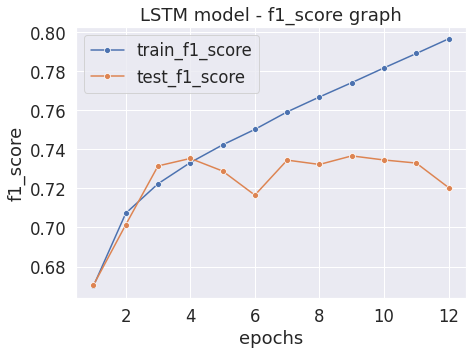

In [67]:
plot_metric(model_name = 'LSTM', history = history_2, metric = 'f1_score')

In [68]:
'''save_weights'''

Model_2.save_weights('/content/drive/MyDrive/Model_10_weights.hdf5')

In [69]:
'''load_weights'''

Model_2.load_weights('/content/drive/MyDrive/Model_10_weights.hdf5')

In [70]:
l, a, p, r, f = Model_2.evaluate(X_train_data, y_train)

17535/17535 [==============================] - 174s 10ms/step - loss: 0.4539 - accuracy: 0.7844 - precision: 0.7895 - recall: 0.7743 - f1_score: 0.7761


In [71]:
l, a, p, r, f = Model_2.evaluate(X_val_data, y_val)

3758/3758 [==============================] - 33s 9ms/step - loss: 0.5208 - accuracy: 0.7385 - precision: 0.7437 - recall: 0.7257 - f1_score: 0.7283


In [72]:
l, a, p, r, f = Model_2.evaluate(X_test_data, y_test)

3758/3758 [==============================] - 34s 9ms/step - loss: 0.5228 - accuracy: 0.7382 - precision: 0.7438 - recall: 0.7263 - f1_score: 0.7286


In [73]:
# predicted value
y_pred  = Model_2.predict(X_test_data, verbose = 1)
y_pred  = np.where(y_pred > 0.5, 1, 0)
y_pred  = np.array(y_pred, dtype = int).tolist()

# true value
y_true  = y_test.tolist()

3758/3758 [==============================] - 28s 7ms/step


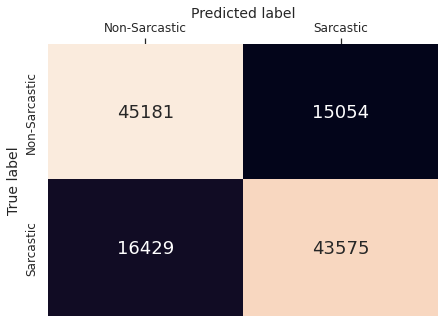

In [74]:
from sklearn.metrics import confusion_matrix

cm =  pd.DataFrame(confusion_matrix(y_true, y_pred), index = ['Non-Sarcastic','Sarcastic'], columns = ['Non-Sarcastic','Sarcastic'])
fig = plt.figure(figsize = (7, 5))

ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
ax.set_ylabel('True label', fontsize = 14)
ax.set_xlabel('Predicted label', fontsize = 14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize = 12)
plt.show()

<pre>
<font color = 'red'><h2><b>Model_5</b><font>

<pre>
Model : CNN, Pre-trained Embedding : Glove Vectors, Pre-processing : without stopwords

<pre>
<font color = 'blue'><b>Text feature : pre_stop_comment</b><font>

In [76]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_length
max_length_c = 40

# tokenizer
tokenizer_c = Tokenizer(num_words = 50000, oov_token = '<unk>')

# fit has to happen only on train data
tokenizer_c.fit_on_texts(X_train['pre_stop_comment'].values)

# texts_to_sequences
X_train_c_sequences     = tokenizer_c.texts_to_sequences(X_train['pre_stop_comment'].values)
X_train_c_stop_padding = pad_sequences(X_train_c_sequences, maxlen = max_length_c)

X_val_c_sequences    = tokenizer_c.texts_to_sequences(X_val['pre_stop_comment'].values)
X_val_c_stop_padding = pad_sequences(X_val_c_sequences, maxlen = max_length_c)

X_test_c_sequences     = tokenizer_c.texts_to_sequences(X_test['pre_stop_comment'].values)
X_test_c_stop_padding = pad_sequences(X_test_c_sequences, maxlen = max_length_c)


# shape
print('After_padding :')
print('\nX_train : ', X_train_c_stop_padding.shape)
print('X_val   : ', X_val_c_stop_padding.shape)
print('X_test  : ', X_test_c_stop_padding.shape)
print()
print('='* 110)

#
vocab_size_c = tokenizer_c.word_index
print('\nVocab_size "comment" :', len(vocab_size_c))

###############################################[embedding_matrix]###################################################

#
embedding_size_c = 300

# create a weight matrix for words in training docs
embedding_matrix_c = np.zeros((len(vocab_size_c) + 1, embedding_size_c))

for word, i in tokenizer_c.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_c[i] = embedding_vector

print('\nEmbedding_matrix_shape :', embedding_matrix_c.shape)

After_padding :

X_train :  (561110, 40)
X_val   :  (120238, 40)
X_test  :  (120239, 40)


Vocab_size "comment" : 135102

Embedding_matrix_shape : (135103, 300)


<pre>
<font color = 'blue'><b>Numerical comment features : c_char, c_punct, c_tokens, c_polarity, c_subjectivity</b><font>

In [21]:
###########################################[feature : "c_char"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_char'].values.reshape(-1, 1))

# transform
X_train_c_char = Standard_Scaler.transform(X_train['c_char'].values.reshape(-1, 1))
X_val_c_char   = Standard_Scaler.transform(X_val['c_char'].values.reshape(-1, 1))
X_test_c_char  = Standard_Scaler.transform(X_test['c_char'].values.reshape(-1, 1))

# shape
print('X_train_c_char         : ', X_train_c_char.shape)
print('X_val_c_char           : ', X_val_c_char.shape)
print('X_test_c_char          : ', X_test_c_char.shape)

##########################################[feature : "c_punct"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_punct'].values.reshape(-1, 1))

# transform
X_train_c_punct = Standard_Scaler.transform(X_train['c_punct'].values.reshape(-1, 1))
X_val_c_punct   = Standard_Scaler.transform(X_val['c_punct'].values.reshape(-1, 1))
X_test_c_punct  = Standard_Scaler.transform(X_test['c_punct'].values.reshape(-1, 1))

# shape
print('\nX_train_c_punct        : ', X_train_c_punct.shape)
print('X_val_c_punct          : ', X_val_c_punct.shape)
print('X_test_c_punct         : ', X_test_c_punct.shape)

#########################################[feature : "c_tokens"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_tokens'].values.reshape(-1, 1))

# transform
X_train_c_tokens = Standard_Scaler.transform(X_train['c_tokens'].values.reshape(-1, 1))
X_val_c_tokens   = Standard_Scaler.transform(X_val['c_tokens'].values.reshape(-1, 1))
X_test_c_tokens  = Standard_Scaler.transform(X_test['c_tokens'].values.reshape(-1, 1))

# shape
print('\nX_train_c_tokens       : ', X_train_c_tokens.shape)
print('X_val_c_tokens         : ', X_val_c_tokens.shape)
print('X_test_c_tokens        : ', X_test_c_tokens.shape)

#######################################[feature : "c_polarity"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_polarity'].values.reshape(-1, 1))

# transform
X_train_c_polarity = Standard_Scaler.transform(X_train['c_polarity'].values.reshape(-1, 1))
X_val_c_polarity   = Standard_Scaler.transform(X_val['c_polarity'].values.reshape(-1, 1))
X_test_c_polarity  = Standard_Scaler.transform(X_test['c_polarity'].values.reshape(-1, 1))

# shape
print('\nX_train_c_polarity     : ', X_train_c_polarity.shape)
print('X_val_c_polarity       : ', X_val_c_polarity.shape)
print('X_test_c_polarity      : ', X_test_c_polarity.shape)

###################################[feature : "c_subjectivity"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_subjectivity'].values.reshape(-1, 1))

# transform
X_train_c_subjectivity = Standard_Scaler.transform(X_train['c_subjectivity'].values.reshape(-1, 1))
X_val_c_subjectivity   = Standard_Scaler.transform(X_val['c_subjectivity'].values.reshape(-1, 1))
X_test_c_subjectivity  = Standard_Scaler.transform(X_test['c_subjectivity'].values.reshape(-1, 1))

# shape
print('\nX_train_c_subjectivity : ', X_train_c_subjectivity.shape)
print('X_val_c_subjectivity   : ', X_val_c_subjectivity.shape)
print('X_test_c_subjectivity  : ', X_test_c_subjectivity.shape)

X_train_c_char         :  (561110, 1)
X_val_c_char           :  (120238, 1)
X_test_c_char          :  (120239, 1)

X_train_c_punct        :  (561110, 1)
X_val_c_punct          :  (120238, 1)
X_test_c_punct         :  (120239, 1)

X_train_c_tokens       :  (561110, 1)
X_val_c_tokens         :  (120238, 1)
X_test_c_tokens        :  (120239, 1)

X_train_c_polarity     :  (561110, 1)
X_val_c_polarity       :  (120238, 1)
X_test_c_polarity      :  (120239, 1)

X_train_c_subjectivity :  (561110, 1)
X_val_c_subjectivity   :  (120238, 1)
X_test_c_subjectivity  :  (120239, 1)


<pre>
<font color = 'blue'><b>Text feature : pre_stop_parent_comment</b><font>

In [77]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_length
max_length_pc = 150

# tokenizer
tokenizer_pc = Tokenizer(num_words = 50000, oov_token = '<unk>')

# fit has to happen only on train data
tokenizer_pc.fit_on_texts(X_train['pre_stop_parent_comment'].values)

# texts_to_sequences
X_train_pc_sequences = tokenizer_pc.texts_to_sequences(X_train['pre_stop_parent_comment'].values)
X_train_pc_stop_padding   = pad_sequences(X_train_pc_sequences, maxlen = max_length_pc)

X_val_pc_sequences   = tokenizer_pc.texts_to_sequences(X_val['pre_stop_parent_comment'].values)
X_val_pc_stop_padding     = pad_sequences(X_val_pc_sequences, maxlen = max_length_pc)

X_test_pc_sequences  = tokenizer_pc.texts_to_sequences(X_test['pre_stop_parent_comment'].values)
X_test_pc_stop_padding    = pad_sequences(X_test_pc_sequences, maxlen = max_length_pc)


# shape
print('After_padding :')
print('\nX_train : ', X_train_pc_stop_padding.shape)
print('X_val   : ', X_val_pc_stop_padding.shape)
print('X_test  : ', X_test_pc_stop_padding.shape)
print()
print('='* 110)

#
vocab_size_pc = tokenizer_pc.word_index
print('\nVocab_size "parent_comment" :', len(vocab_size_pc))

###############################################[embedding_matrix]###################################################

#
embedding_size_pc = 300

# create a weight matrix for words in training docs
embedding_matrix_pc = np.zeros((len(vocab_size_pc) + 1, embedding_size_pc))

for word, i in tokenizer_pc.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_pc[i] = embedding_vector

print('\nEmbedding_matrix_shape :', embedding_matrix_pc.shape)

After_padding :

X_train :  (561110, 150)
X_val   :  (120238, 150)
X_test  :  (120239, 150)


Vocab_size "parent_comment" : 199910

Embedding_matrix_shape : (199911, 300)


<pre>
<font color = 'blue'><b>Numerical parent_comment features : pc_char, pc_punct, pc_tokens, pc_polarity, pc_subjectivity</b><font>

In [22]:
###########################################[feature : "pc_char"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_char'].values.reshape(-1, 1))

# transform
X_train_pc_char = Standard_Scaler.transform(X_train['pc_char'].values.reshape(-1, 1))
X_val_pc_char   = Standard_Scaler.transform(X_val['pc_char'].values.reshape(-1, 1))
X_test_pc_char  = Standard_Scaler.transform(X_test['pc_char'].values.reshape(-1, 1))

# shape
print('X_train_pc_char         : ', X_train_pc_char.shape)
print('X_val_pc_char           : ', X_val_pc_char.shape)
print('X_test_pc_char          : ', X_test_pc_char.shape)

##########################################[feature : "pc_punct"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_punct'].values.reshape(-1, 1))

# transform
X_train_pc_punct = Standard_Scaler.transform(X_train['pc_punct'].values.reshape(-1, 1))
X_val_pc_punct   = Standard_Scaler.transform(X_val['pc_punct'].values.reshape(-1, 1))
X_test_pc_punct  = Standard_Scaler.transform(X_test['pc_punct'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_punct        : ', X_train_pc_punct.shape)
print('X_val_pc_punct          : ', X_val_pc_punct.shape)
print('X_test_pc_punct         : ', X_test_pc_punct.shape)

#########################################[feature : "pc_tokens"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_tokens'].values.reshape(-1, 1))

# transform
X_train_pc_tokens = Standard_Scaler.transform(X_train['pc_tokens'].values.reshape(-1, 1))
X_val_pc_tokens   = Standard_Scaler.transform(X_val['pc_tokens'].values.reshape(-1, 1))
X_test_pc_tokens  = Standard_Scaler.transform(X_test['pc_tokens'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_tokens       : ', X_train_pc_tokens.shape)
print('X_val_pc_tokens         : ', X_val_pc_tokens.shape)
print('X_test_pc_tokens        : ', X_test_pc_tokens.shape)

#######################################[feature : "pc_polarity"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_polarity'].values.reshape(-1, 1))

# transform
X_train_pc_polarity = Standard_Scaler.transform(X_train['pc_polarity'].values.reshape(-1, 1))
X_val_pc_polarity   = Standard_Scaler.transform(X_val['pc_polarity'].values.reshape(-1, 1))
X_test_pc_polarity  = Standard_Scaler.transform(X_test['pc_polarity'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_polarity     : ', X_train_pc_polarity.shape)
print('X_val_pc_polarity       : ', X_val_pc_polarity.shape)
print('X_test_pc_polarity      : ', X_test_pc_polarity.shape)

###################################[feature : "pc_subjectivity"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_subjectivity'].values.reshape(-1, 1))

# transform
X_train_pc_subjectivity = Standard_Scaler.transform(X_train['pc_subjectivity'].values.reshape(-1, 1))
X_val_pc_subjectivity   = Standard_Scaler.transform(X_val['pc_subjectivity'].values.reshape(-1, 1))
X_test_pc_subjectivity  = Standard_Scaler.transform(X_test['pc_subjectivity'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_subjectivity : ', X_train_pc_subjectivity.shape)
print('X_val_pc_subjectivity   : ', X_val_pc_subjectivity.shape)
print('X_test_pc_subjectivity  : ', X_test_pc_subjectivity.shape)

X_train_pc_char         :  (561110, 1)
X_val_pc_char           :  (120238, 1)
X_test_pc_char          :  (120239, 1)

X_train_pc_punct        :  (561110, 1)
X_val_pc_punct          :  (120238, 1)
X_test_pc_punct         :  (120239, 1)

X_train_pc_tokens       :  (561110, 1)
X_val_pc_tokens         :  (120238, 1)
X_test_pc_tokens        :  (120239, 1)

X_train_pc_polarity     :  (561110, 1)
X_val_pc_polarity       :  (120238, 1)
X_test_pc_polarity      :  (120239, 1)

X_train_pc_subjectivity :  (561110, 1)
X_val_pc_subjectivity   :  (120238, 1)
X_test_pc_subjectivity  :  (120239, 1)


<pre>
<font color = 'blue'><b>Numerical features : score, ups, downs</b><font>

In [12]:
########################################[feature : "score"]#############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['score'].values.reshape(-1, 1))

# transform
X_train_score = Standard_Scaler.transform(X_train['score'].values.reshape(-1, 1))
X_val_score   = Standard_Scaler.transform(X_val['score'].values.reshape(-1, 1))
X_test_score  = Standard_Scaler.transform(X_test['score'].values.reshape(-1, 1))

# shape
print('X_train_score : ', X_train_score.shape)
print('X_val_score   : ', X_val_score.shape)
print('X_test_score  : ', X_test_score.shape)

########################################[feature : "ups"]##############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['ups'].values.reshape(-1, 1))

# transform
X_train_ups = Standard_Scaler.transform(X_train['ups'].values.reshape(-1, 1))
X_val_ups   = Standard_Scaler.transform(X_val['ups'].values.reshape(-1, 1))
X_test_ups  = Standard_Scaler.transform(X_test['ups'].values.reshape(-1, 1))

# shape
print('\nX_train_ups   : ', X_train_ups.shape)
print('X_val_ups     : ', X_val_ups.shape)
print('X_test_ups    : ', X_test_ups.shape)

########################################[feature : "downs"]#############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['downs'].values.reshape(-1, 1))

# transform
X_train_downs = Standard_Scaler.transform(X_train['downs'].values.reshape(-1, 1))
X_val_downs   = Standard_Scaler.transform(X_val['downs'].values.reshape(-1, 1))
X_test_downs  = Standard_Scaler.transform(X_test['downs'].values.reshape(-1, 1))

# shape
print('\nX_train_downs : ', X_train_downs.shape)
print('X_val_downs   : ', X_val_downs.shape)
print('X_test_downs  : ', X_test_downs.shape)

X_train_score :  (561110, 1)
X_val_score   :  (120238, 1)
X_test_score  :  (120239, 1)

X_train_ups   :  (561110, 1)
X_val_ups     :  (120238, 1)
X_test_ups    :  (120239, 1)

X_train_downs :  (561110, 1)
X_val_downs   :  (120238, 1)
X_test_downs  :  (120239, 1)


<pre>
<font color = 'blue'><b>Model : Convolutional Neural Network</b><font>

In [78]:
Model_3 = cnn_model(max_length_1 = max_length_c, vocab_size_1 = vocab_size_c, embedding_size_1 = embedding_size_c, embedding_matrix_1 = embedding_matrix_c, 
                    max_length_2 = max_length_pc, vocab_size_2 = vocab_size_pc, embedding_size_2 = embedding_size_pc, embedding_matrix_2 = embedding_matrix_pc)

In [79]:
Model_3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comment (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 parent_comment (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 300)      40530900    ['comment[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 150, 300)     59973300    ['parent_comment[0][0]']         
                                                                                              

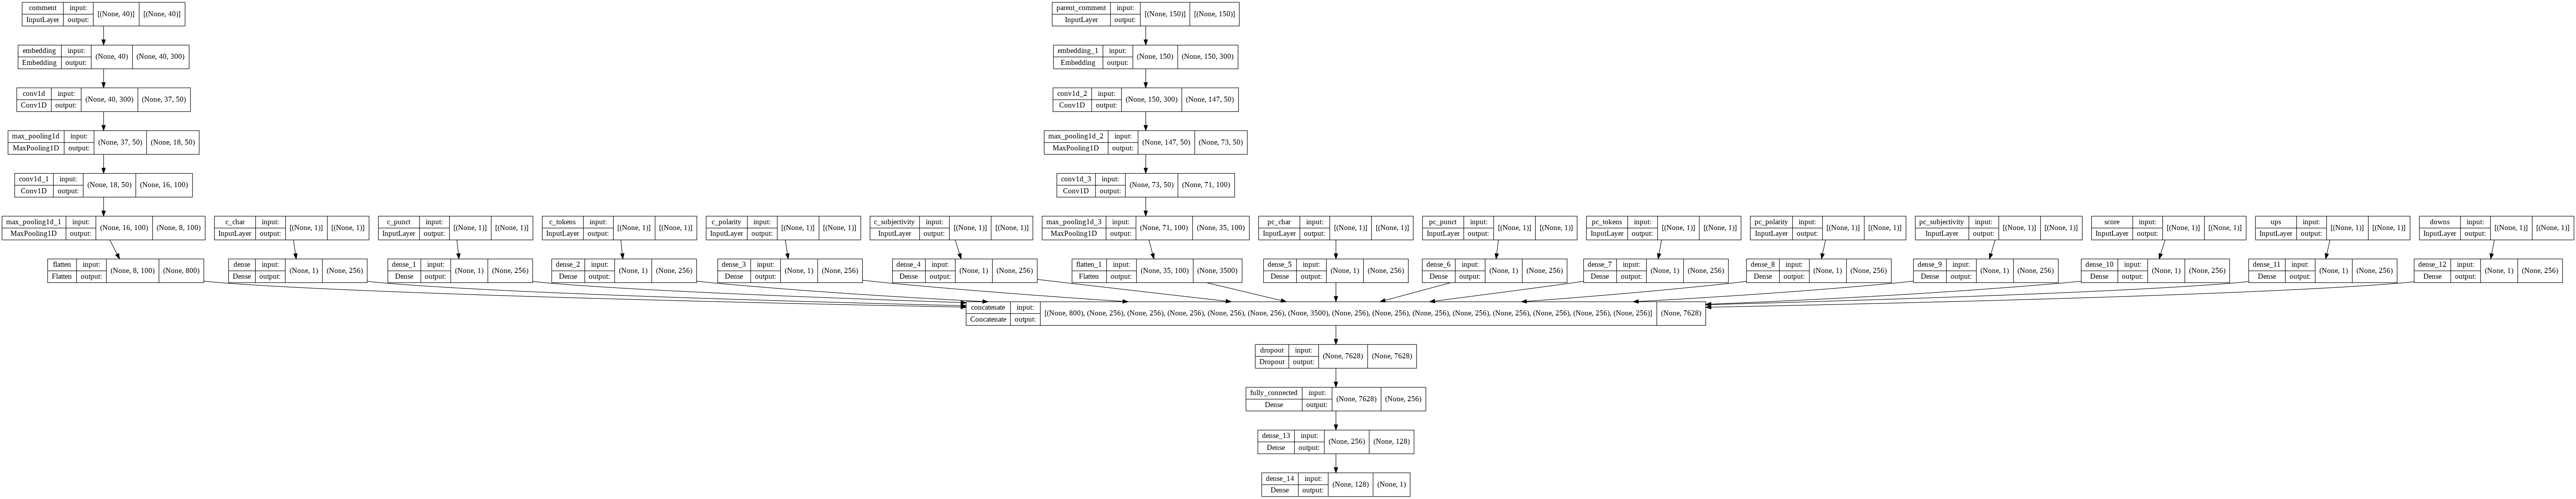

In [80]:
from tensorflow.keras.utils import plot_model

plot_model(Model_3,
           to_file = 'Model_3.png',
           show_shapes = True)

In [81]:
from tensorflow.keras.optimizers import Adam

Model_3.compile(optimizer = Adam(),
                loss      = 'binary_crossentropy',
                metrics   = ['accuracy', precision, recall, f1_score])

In [82]:
X_train_data = [X_train_c_stop_padding, 
                X_train_c_char, X_train_c_punct, X_train_c_tokens, X_train_c_polarity, X_train_c_subjectivity,
                X_train_pc_stop_padding, 
                X_train_pc_char, X_train_pc_punct, X_train_pc_tokens, X_train_pc_polarity, X_train_pc_subjectivity,
                X_train_score, X_train_ups, X_train_downs]

X_val_data   = [X_val_c_stop_padding, 
                X_val_c_char, X_val_c_punct, X_val_c_tokens, X_val_c_polarity, X_val_c_subjectivity,
                X_val_pc_stop_padding, 
                X_val_pc_char, X_val_pc_punct, X_val_pc_tokens, X_val_pc_polarity, X_val_pc_subjectivity,
                X_val_score, X_val_ups, X_val_downs]

X_test_data  = [X_test_c_stop_padding, 
                X_test_c_char, X_test_c_punct, X_test_c_tokens, X_test_c_polarity, X_test_c_subjectivity,
                X_test_pc_stop_padding, 
                X_test_pc_char, X_test_pc_punct, X_test_pc_tokens, X_test_pc_polarity, X_test_pc_subjectivity,
                X_test_score, X_test_ups, X_test_downs]

In [83]:
history_3 = Model_3.fit(x               = X_train_data, 
                        y               = y_train, 
                        batch_size      = 1024, 
                        epochs          = 50, 
                        validation_data = (X_val_data,
                                           y_val), 
                        class_weight    = class_weight_dict,
                        callbacks       = callbacks_list)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
548/548 [==============================] - 38s 67ms/step - loss: 0.6201 - accuracy: 0.6489 - precision: 0.6668 - recall: 0.6022 - f1_score: 0.6295 - val_loss: 0.6030 - val_accuracy: 0.6683 - val_precision: 0.6963 - val_recall: 0.5944 - val_f1_score: 0.6411 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999000574917021.
Epoch 2/50
548/548 [==============================] - 36s 65ms/step - loss: 0.5911 - accuracy: 0.6802 - precision: 0.6977 - recall: 0.6362 - f1_score: 0.6644 - val_loss: 0.5920 - val_accuracy: 0.6781 - val_precision: 0.7056 - val_recall: 0.6089 - val_f1_score: 0.6535 - lr: 9.9990e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000999700106714659.
Epoch 3/50
548/548 [==============================] - 35s 64ms/step - loss: 0.5759 - accuracy: 0.6934 - precision: 0.7109 - recall: 0.6531 - f1_score: 0.6795 - val_loss: 0.5941 - val_accuracy: 0.

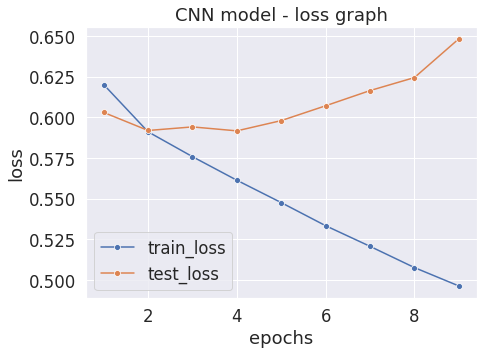

In [84]:
plot_metric(model_name = 'CNN', history = history_3, metric = 'loss')

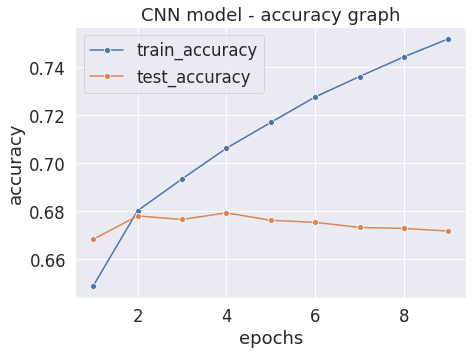

In [85]:
plot_metric(model_name = 'CNN', history = history_3, metric = 'accuracy')

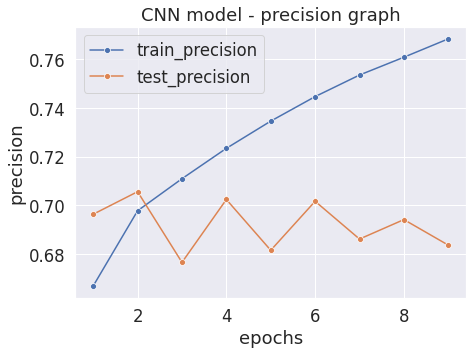

In [86]:
plot_metric(model_name = 'CNN', history = history_3, metric = 'precision')

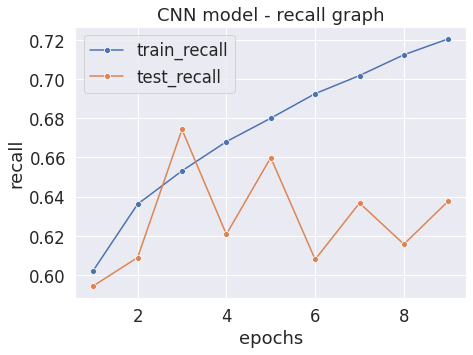

In [87]:
plot_metric(model_name = 'CNN', history = history_3, metric = 'recall')

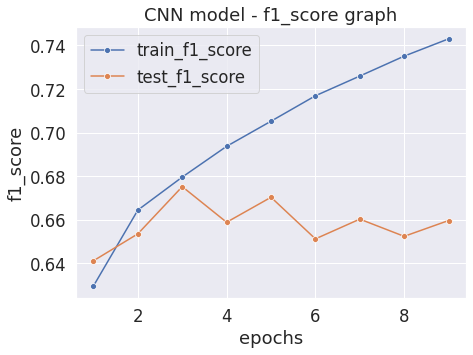

In [88]:
plot_metric(model_name = 'CNN', history = history_3, metric = 'f1_score')

In [89]:
'''save_weights'''

Model_3.save_weights('/content/drive/MyDrive/Model_11_weights.hdf5')

In [90]:
'''load_weights'''

Model_3.load_weights('/content/drive/MyDrive/Model_11_weights.hdf5')

In [91]:
l, a, p, r, f = Model_3.evaluate(X_train_data, y_train)

17535/17535 [==============================] - 105s 6ms/step - loss: 0.5364 - accuracy: 0.7278 - precision: 0.7558 - recall: 0.6711 - f1_score: 0.7039


In [92]:
l, a, p, r, f = Model_3.evaluate(X_val_data, y_val)

3758/3758 [==============================] - 22s 6ms/step - loss: 0.5917 - accuracy: 0.6794 - precision: 0.7022 - recall: 0.6205 - f1_score: 0.6514


In [93]:
l, a, p, r, f = Model_3.evaluate(X_test_data, y_test)

3758/3758 [==============================] - 22s 6ms/step - loss: 0.5921 - accuracy: 0.6794 - precision: 0.7022 - recall: 0.6206 - f1_score: 0.6510


In [94]:
# predicted value
y_pred  = Model_3.predict(X_test_data, verbose = 1)
y_pred  = np.where(y_pred > 0.5, 1, 0)
y_pred  = np.array(y_pred, dtype = int).tolist()

# true value
y_true  = y_test.tolist()

3758/3758 [==============================] - 16s 4ms/step


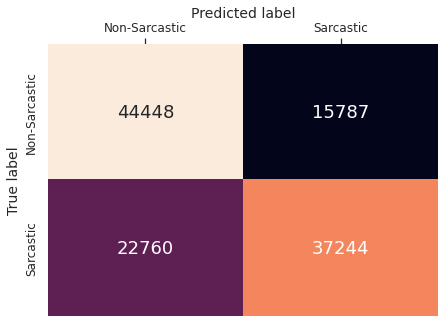

In [95]:
from sklearn.metrics import confusion_matrix

cm =  pd.DataFrame(confusion_matrix(y_true, y_pred), index = ['Non-Sarcastic','Sarcastic'], columns = ['Non-Sarcastic','Sarcastic'])
fig = plt.figure(figsize = (7, 5))

ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
ax.set_ylabel('True label', fontsize = 14)
ax.set_xlabel('Predicted label', fontsize = 14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize = 12)
plt.show()

<pre>
<font color = 'red'><h2><b>Model_6</b><font>

<pre>
Model : LSTM, Pre-trained Embedding : Glove Vectors, Pre-processing : without stopwords

<pre>
<font color = 'blue'><b>Text & Numerical features :</b><font>
<pre>
Same as previous model

<pre>
<font color = 'blue'><b>Model : Long Short Term Memory</b><font>

In [97]:
Model_4 = lstm_model(max_length_1 = max_length_c, vocab_size_1 = vocab_size_c, embedding_size_1 = embedding_size_c, embedding_matrix_1 = embedding_matrix_c, 
                     max_length_2 = max_length_pc, vocab_size_2 = vocab_size_pc, embedding_size_2 = embedding_size_pc, embedding_matrix_2 = embedding_matrix_pc)

In [98]:
Model_4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comment (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 parent_comment (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 300)      40530900    ['comment[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 150, 300)     59973300    ['parent_comment[0][0]']         
                                                                                              

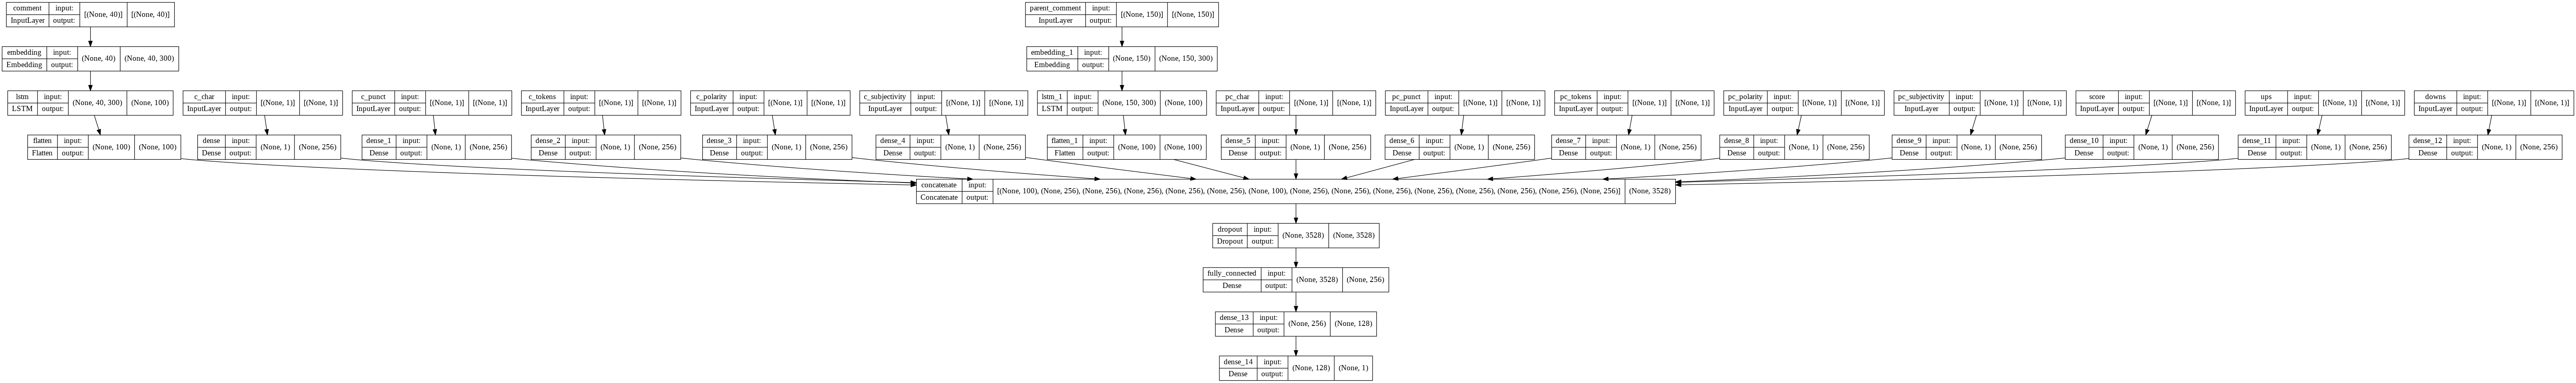

In [99]:
from tensorflow.keras.utils import plot_model

plot_model(Model_4,
           to_file = 'Model_4.png',
           show_shapes = True)

In [100]:
from tensorflow.keras.optimizers import Adam

Model_4.compile(optimizer = Adam(),
                loss      = 'binary_crossentropy',
                metrics   = ['accuracy', precision, recall, f1_score])

In [101]:
X_train_data = [X_train_c_stop_padding, 
                X_train_c_char, X_train_c_punct, X_train_c_tokens, X_train_c_polarity, X_train_c_subjectivity,
                X_train_pc_stop_padding, 
                X_train_pc_char, X_train_pc_punct, X_train_pc_tokens, X_train_pc_polarity, X_train_pc_subjectivity,
                X_train_score, X_train_ups, X_train_downs]

X_val_data   = [X_val_c_stop_padding, 
                X_val_c_char, X_val_c_punct, X_val_c_tokens, X_val_c_polarity, X_val_c_subjectivity,
                X_val_pc_stop_padding, 
                X_val_pc_char, X_val_pc_punct, X_val_pc_tokens, X_val_pc_polarity, X_val_pc_subjectivity,
                X_val_score, X_val_ups, X_val_downs]

X_test_data  = [X_test_c_stop_padding, 
                X_test_c_char, X_test_c_punct, X_test_c_tokens, X_test_c_polarity, X_test_c_subjectivity,
                X_test_pc_stop_padding, 
                X_test_pc_char, X_test_pc_punct, X_test_pc_tokens, X_test_pc_polarity, X_test_pc_subjectivity,
                X_test_score, X_test_ups, X_test_downs]

In [102]:
history_4 = Model_4.fit(x               = X_train_data, 
                        y               = y_train, 
                        batch_size      = 1024, 
                        epochs          = 50, 
                        validation_data = (X_val_data,
                                           y_val), 
                        class_weight    = class_weight_dict,
                        callbacks       = callbacks_list)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
548/548 [==============================] - 57s 97ms/step - loss: 0.6007 - accuracy: 0.6693 - precision: 0.6832 - recall: 0.6356 - f1_score: 0.6562 - val_loss: 0.5731 - val_accuracy: 0.6941 - val_precision: 0.7153 - val_recall: 0.6428 - val_f1_score: 0.6769 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999000574917021.
Epoch 2/50
548/548 [==============================] - 51s 93ms/step - loss: 0.5644 - accuracy: 0.7031 - precision: 0.7196 - recall: 0.6661 - f1_score: 0.6906 - val_loss: 0.5584 - val_accuracy: 0.7078 - val_precision: 0.7177 - val_recall: 0.6832 - val_f1_score: 0.6997 - lr: 9.9990e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000999700106714659.
Epoch 3/50
548/548 [==============================] - 52s 94ms/step - loss: 0.5483 - accuracy: 0.7160 - precision: 0.7308 - recall: 0.6842 - f1_score: 0.7058 - val_loss: 0.5545 - val_accuracy: 0.

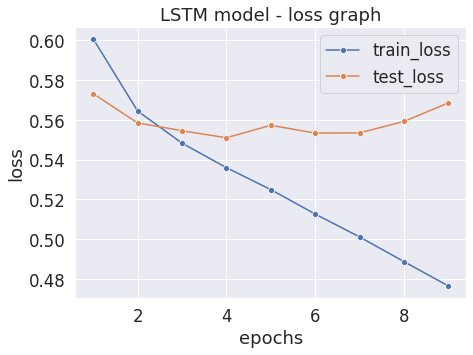

In [103]:
plot_metric(model_name = 'LSTM', history = history_4, metric = 'loss')

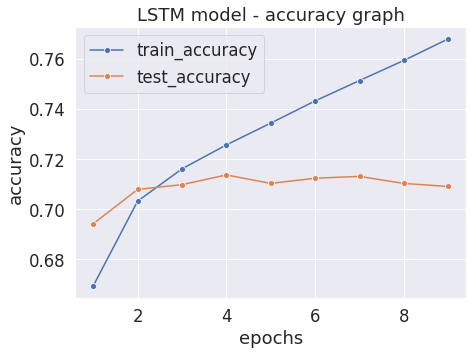

In [104]:
plot_metric(model_name = 'LSTM', history = history_4, metric = 'accuracy')

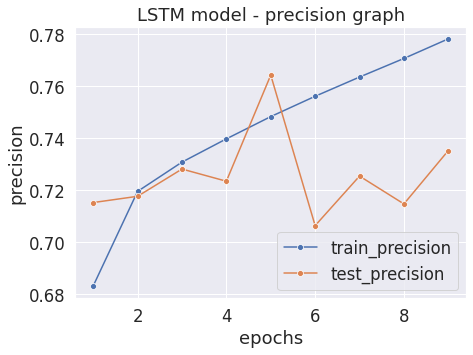

In [105]:
plot_metric(model_name = 'LSTM', history = history_4, metric = 'precision')

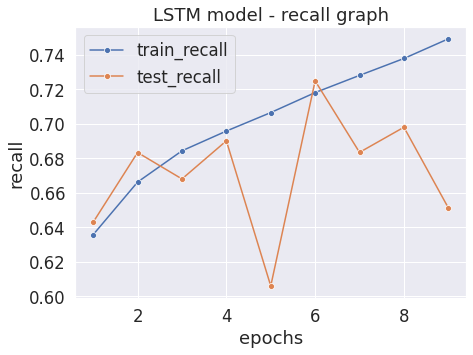

In [106]:
plot_metric(model_name = 'LSTM', history = history_4, metric = 'recall')

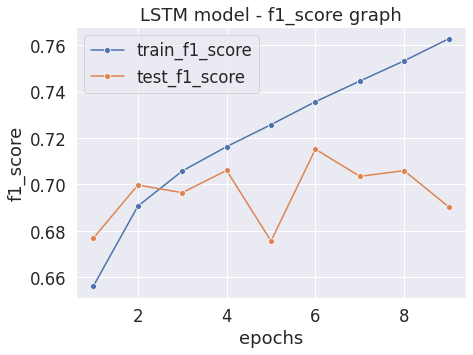

In [107]:
plot_metric(model_name = 'LSTM', history = history_4, metric = 'f1_score')

In [109]:
'''save_weights'''

Model_4.save_weights('/content/drive/MyDrive/Model_12_weights.hdf5')

In [110]:
'''load_weights'''

Model_4.load_weights('/content/drive/MyDrive/Model_12_weights.hdf5')

In [111]:
l, a, p, r, f = Model_4.evaluate(X_train_data, y_train)

17535/17535 [==============================] - 181s 10ms/step - loss: 0.5172 - accuracy: 0.7410 - precision: 0.7510 - recall: 0.7188 - f1_score: 0.7281


In [112]:
l, a, p, r, f = Model_4.evaluate(X_val_data, y_val)

3758/3758 [==============================] - 35s 9ms/step - loss: 0.5510 - accuracy: 0.7136 - precision: 0.7235 - recall: 0.6899 - f1_score: 0.6995


In [113]:
l, a, p, r, f = Model_4.evaluate(X_test_data, y_test)

3758/3758 [==============================] - 34s 9ms/step - loss: 0.5529 - accuracy: 0.7116 - precision: 0.7214 - recall: 0.6894 - f1_score: 0.6979


In [114]:
# predicted value
y_pred  = Model_4.predict(X_test_data, verbose = 1)
y_pred  = np.where(y_pred > 0.5, 1, 0)
y_pred  = np.array(y_pred, dtype = int).tolist()

# true value
y_true  = y_test.tolist()

3758/3758 [==============================] - 29s 7ms/step


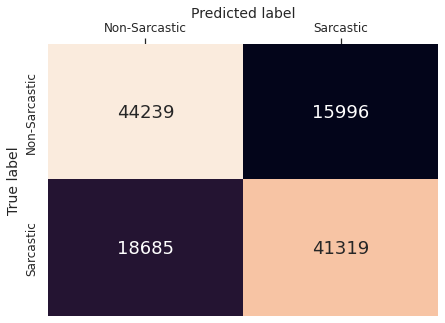

In [115]:
from sklearn.metrics import confusion_matrix

cm =  pd.DataFrame(confusion_matrix(y_true, y_pred), index = ['Non-Sarcastic','Sarcastic'], columns = ['Non-Sarcastic','Sarcastic'])
fig = plt.figure(figsize = (7, 5))

ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
ax.set_ylabel('True label', fontsize = 14)
ax.set_xlabel('Predicted label', fontsize = 14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize = 12)
plt.show()

<pre>
<font color = 'red'><h2><b>Model_7, Model_8, Model_9 & Model_10</b><font>

<pre><font color = 'blue'><b>Fast Text</b><font>

In [1]:
# FastText link : https://www.kaggle.com/datasets/yekenot/fasttext-crawl-300d-2m

import numpy as np

#
ft_path = r'crawl-300d-2M.vec'

def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype = 'float32')

embeddings_index = dict(get_coefs( * o.rstrip().rsplit(' ')) for o in open(ft_path,'r',encoding = 'utf-8'))

print('Found %s word vectors.' % len(embeddings_index))

Found 2000000 word vectors.


<pre>
<font color = 'red'><h2><b>Model_7</b><font>

<pre>
Model : CNN, Pre-trained Embedding : Fast Text, Pre-processing : with stopwords

<pre>
<font color = 'blue'><b>Text feature : pre_comment</b><font>

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_length
max_length_c = 40

# tokenizer
tokenizer_c = Tokenizer(num_words = 50000, oov_token = '<unk>')

# fit has to happen only on train data
tokenizer_c.fit_on_texts(X_train['pre_comment'].values)

# texts_to_sequences
X_train_c_sequences = tokenizer_c.texts_to_sequences(X_train['pre_comment'].values)
X_train_c_padding   = pad_sequences(X_train_c_sequences, maxlen = max_length_c)

X_val_c_sequences   = tokenizer_c.texts_to_sequences(X_val['pre_comment'].values)
X_val_c_padding     = pad_sequences(X_val_c_sequences, maxlen = max_length_c)

X_test_c_sequences  = tokenizer_c.texts_to_sequences(X_test['pre_comment'].values)
X_test_c_padding    = pad_sequences(X_test_c_sequences, maxlen = max_length_c)


# shape
print('After_padding :')
print('\nX_train : ', X_train_c_padding.shape)
print('X_val   : ', X_val_c_padding.shape)
print('X_test  : ', X_test_c_padding.shape)
print()
print('='* 110)

#
vocab_size_c = tokenizer_c.word_index
print('\nVocab_size "comment" :', len(vocab_size_c))

###############################################[embedding_matrix]###################################################

#
embedding_size_c = 300

# create a weight matrix for words in training docs
embedding_matrix_c = np.zeros((len(vocab_size_c) + 1, embedding_size_c))

for word, i in tokenizer_c.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_c[i] = embedding_vector

print('\nEmbedding_matrix_shape :', embedding_matrix_c.shape)

After_padding :

X_train :  (561110, 40)
X_val   :  (120238, 40)
X_test  :  (120239, 40)


Vocab_size "comment" : 135105

Embedding_matrix_shape : (135106, 300)


<pre>
<font color = 'blue'><b>Numerical comment features : c_char, c_punct, c_tokens, c_polarity, c_subjectivity</b><font>

In [21]:
###########################################[feature : "c_char"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_char'].values.reshape(-1, 1))

# transform
X_train_c_char = Standard_Scaler.transform(X_train['c_char'].values.reshape(-1, 1))
X_val_c_char   = Standard_Scaler.transform(X_val['c_char'].values.reshape(-1, 1))
X_test_c_char  = Standard_Scaler.transform(X_test['c_char'].values.reshape(-1, 1))

# shape
print('X_train_c_char         : ', X_train_c_char.shape)
print('X_val_c_char           : ', X_val_c_char.shape)
print('X_test_c_char          : ', X_test_c_char.shape)

##########################################[feature : "c_punct"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_punct'].values.reshape(-1, 1))

# transform
X_train_c_punct = Standard_Scaler.transform(X_train['c_punct'].values.reshape(-1, 1))
X_val_c_punct   = Standard_Scaler.transform(X_val['c_punct'].values.reshape(-1, 1))
X_test_c_punct  = Standard_Scaler.transform(X_test['c_punct'].values.reshape(-1, 1))

# shape
print('\nX_train_c_punct        : ', X_train_c_punct.shape)
print('X_val_c_punct          : ', X_val_c_punct.shape)
print('X_test_c_punct         : ', X_test_c_punct.shape)

#########################################[feature : "c_tokens"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_tokens'].values.reshape(-1, 1))

# transform
X_train_c_tokens = Standard_Scaler.transform(X_train['c_tokens'].values.reshape(-1, 1))
X_val_c_tokens   = Standard_Scaler.transform(X_val['c_tokens'].values.reshape(-1, 1))
X_test_c_tokens  = Standard_Scaler.transform(X_test['c_tokens'].values.reshape(-1, 1))

# shape
print('\nX_train_c_tokens       : ', X_train_c_tokens.shape)
print('X_val_c_tokens         : ', X_val_c_tokens.shape)
print('X_test_c_tokens        : ', X_test_c_tokens.shape)

#######################################[feature : "c_polarity"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_polarity'].values.reshape(-1, 1))

# transform
X_train_c_polarity = Standard_Scaler.transform(X_train['c_polarity'].values.reshape(-1, 1))
X_val_c_polarity   = Standard_Scaler.transform(X_val['c_polarity'].values.reshape(-1, 1))
X_test_c_polarity  = Standard_Scaler.transform(X_test['c_polarity'].values.reshape(-1, 1))

# shape
print('\nX_train_c_polarity     : ', X_train_c_polarity.shape)
print('X_val_c_polarity       : ', X_val_c_polarity.shape)
print('X_test_c_polarity      : ', X_test_c_polarity.shape)

###################################[feature : "c_subjectivity"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_subjectivity'].values.reshape(-1, 1))

# transform
X_train_c_subjectivity = Standard_Scaler.transform(X_train['c_subjectivity'].values.reshape(-1, 1))
X_val_c_subjectivity   = Standard_Scaler.transform(X_val['c_subjectivity'].values.reshape(-1, 1))
X_test_c_subjectivity  = Standard_Scaler.transform(X_test['c_subjectivity'].values.reshape(-1, 1))

# shape
print('\nX_train_c_subjectivity : ', X_train_c_subjectivity.shape)
print('X_val_c_subjectivity   : ', X_val_c_subjectivity.shape)
print('X_test_c_subjectivity  : ', X_test_c_subjectivity.shape)

X_train_c_char         :  (561110, 1)
X_val_c_char           :  (120238, 1)
X_test_c_char          :  (120239, 1)

X_train_c_punct        :  (561110, 1)
X_val_c_punct          :  (120238, 1)
X_test_c_punct         :  (120239, 1)

X_train_c_tokens       :  (561110, 1)
X_val_c_tokens         :  (120238, 1)
X_test_c_tokens        :  (120239, 1)

X_train_c_polarity     :  (561110, 1)
X_val_c_polarity       :  (120238, 1)
X_test_c_polarity      :  (120239, 1)

X_train_c_subjectivity :  (561110, 1)
X_val_c_subjectivity   :  (120238, 1)
X_test_c_subjectivity  :  (120239, 1)


<pre>
<font color = 'blue'><b>Text feature : pre_parent_comment</b><font>

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_length
max_length_pc = 150

# tokenizer
tokenizer_pc = Tokenizer(num_words = 50000, oov_token = '<unk>')

# fit has to happen only on train data
tokenizer_pc.fit_on_texts(X_train['pre_parent_comment'].values)

# texts_to_sequences
X_train_pc_sequences = tokenizer_pc.texts_to_sequences(X_train['pre_parent_comment'].values)
X_train_pc_padding   = pad_sequences(X_train_pc_sequences, maxlen = max_length_pc)

X_val_pc_sequences   = tokenizer_pc.texts_to_sequences(X_val['pre_parent_comment'].values)
X_val_pc_padding     = pad_sequences(X_val_pc_sequences, maxlen = max_length_pc)

X_test_pc_sequences  = tokenizer_pc.texts_to_sequences(X_test['pre_parent_comment'].values)
X_test_pc_padding    = pad_sequences(X_test_pc_sequences, maxlen = max_length_pc)


# shape
print('After_padding :')
print('\nX_train : ', X_train_pc_padding.shape)
print('X_val   : ', X_val_pc_padding.shape)
print('X_test  : ', X_test_pc_padding.shape)
print()
print('='* 110)

#
vocab_size_pc = tokenizer_pc.word_index
print('\nVocab_size "parent_comment" :', len(vocab_size_pc))

###############################################[embedding_matrix]###################################################

#
embedding_size_pc = 300

# create a weight matrix for words in training docs
embedding_matrix_pc = np.zeros((len(vocab_size_pc) + 1, embedding_size_pc))

for word, i in tokenizer_pc.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_pc[i] = embedding_vector

print('\nEmbedding_matrix_shape :', embedding_matrix_pc.shape)

After_padding :

X_train :  (561110, 150)
X_val   :  (120238, 150)
X_test  :  (120239, 150)


Vocab_size "parent_comment" : 199914

Embedding_matrix_shape : (199915, 300)


<pre>
<font color = 'blue'><b>Numerical parent_comment features : pc_char, pc_punct, pc_tokens, pc_polarity, pc_subjectivity</b><font>

In [22]:
###########################################[feature : "pc_char"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_char'].values.reshape(-1, 1))

# transform
X_train_pc_char = Standard_Scaler.transform(X_train['pc_char'].values.reshape(-1, 1))
X_val_pc_char   = Standard_Scaler.transform(X_val['pc_char'].values.reshape(-1, 1))
X_test_pc_char  = Standard_Scaler.transform(X_test['pc_char'].values.reshape(-1, 1))

# shape
print('X_train_pc_char         : ', X_train_pc_char.shape)
print('X_val_pc_char           : ', X_val_pc_char.shape)
print('X_test_pc_char          : ', X_test_pc_char.shape)

##########################################[feature : "pc_punct"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_punct'].values.reshape(-1, 1))

# transform
X_train_pc_punct = Standard_Scaler.transform(X_train['pc_punct'].values.reshape(-1, 1))
X_val_pc_punct   = Standard_Scaler.transform(X_val['pc_punct'].values.reshape(-1, 1))
X_test_pc_punct  = Standard_Scaler.transform(X_test['pc_punct'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_punct        : ', X_train_pc_punct.shape)
print('X_val_pc_punct          : ', X_val_pc_punct.shape)
print('X_test_pc_punct         : ', X_test_pc_punct.shape)

#########################################[feature : "pc_tokens"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_tokens'].values.reshape(-1, 1))

# transform
X_train_pc_tokens = Standard_Scaler.transform(X_train['pc_tokens'].values.reshape(-1, 1))
X_val_pc_tokens   = Standard_Scaler.transform(X_val['pc_tokens'].values.reshape(-1, 1))
X_test_pc_tokens  = Standard_Scaler.transform(X_test['pc_tokens'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_tokens       : ', X_train_pc_tokens.shape)
print('X_val_pc_tokens         : ', X_val_pc_tokens.shape)
print('X_test_pc_tokens        : ', X_test_pc_tokens.shape)

#######################################[feature : "pc_polarity"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_polarity'].values.reshape(-1, 1))

# transform
X_train_pc_polarity = Standard_Scaler.transform(X_train['pc_polarity'].values.reshape(-1, 1))
X_val_pc_polarity   = Standard_Scaler.transform(X_val['pc_polarity'].values.reshape(-1, 1))
X_test_pc_polarity  = Standard_Scaler.transform(X_test['pc_polarity'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_polarity     : ', X_train_pc_polarity.shape)
print('X_val_pc_polarity       : ', X_val_pc_polarity.shape)
print('X_test_pc_polarity      : ', X_test_pc_polarity.shape)

###################################[feature : "pc_subjectivity"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_subjectivity'].values.reshape(-1, 1))

# transform
X_train_pc_subjectivity = Standard_Scaler.transform(X_train['pc_subjectivity'].values.reshape(-1, 1))
X_val_pc_subjectivity   = Standard_Scaler.transform(X_val['pc_subjectivity'].values.reshape(-1, 1))
X_test_pc_subjectivity  = Standard_Scaler.transform(X_test['pc_subjectivity'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_subjectivity : ', X_train_pc_subjectivity.shape)
print('X_val_pc_subjectivity   : ', X_val_pc_subjectivity.shape)
print('X_test_pc_subjectivity  : ', X_test_pc_subjectivity.shape)

X_train_pc_char         :  (561110, 1)
X_val_pc_char           :  (120238, 1)
X_test_pc_char          :  (120239, 1)

X_train_pc_punct        :  (561110, 1)
X_val_pc_punct          :  (120238, 1)
X_test_pc_punct         :  (120239, 1)

X_train_pc_tokens       :  (561110, 1)
X_val_pc_tokens         :  (120238, 1)
X_test_pc_tokens        :  (120239, 1)

X_train_pc_polarity     :  (561110, 1)
X_val_pc_polarity       :  (120238, 1)
X_test_pc_polarity      :  (120239, 1)

X_train_pc_subjectivity :  (561110, 1)
X_val_pc_subjectivity   :  (120238, 1)
X_test_pc_subjectivity  :  (120239, 1)


<pre>
<font color = 'blue'><b>Numerical features : score, ups, downs</b><font>

In [13]:
########################################[feature : "score"]#############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['score'].values.reshape(-1, 1))

# transform
X_train_score = Standard_Scaler.transform(X_train['score'].values.reshape(-1, 1))
X_val_score   = Standard_Scaler.transform(X_val['score'].values.reshape(-1, 1))
X_test_score  = Standard_Scaler.transform(X_test['score'].values.reshape(-1, 1))

# shape
print('X_train_score : ', X_train_score.shape)
print('X_val_score   : ', X_val_score.shape)
print('X_test_score  : ', X_test_score.shape)

########################################[feature : "ups"]##############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['ups'].values.reshape(-1, 1))

# transform
X_train_ups = Standard_Scaler.transform(X_train['ups'].values.reshape(-1, 1))
X_val_ups   = Standard_Scaler.transform(X_val['ups'].values.reshape(-1, 1))
X_test_ups  = Standard_Scaler.transform(X_test['ups'].values.reshape(-1, 1))

# shape
print('\nX_train_ups   : ', X_train_ups.shape)
print('X_val_ups     : ', X_val_ups.shape)
print('X_test_ups    : ', X_test_ups.shape)

########################################[feature : "downs"]#############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['downs'].values.reshape(-1, 1))

# transform
X_train_downs = Standard_Scaler.transform(X_train['downs'].values.reshape(-1, 1))
X_val_downs   = Standard_Scaler.transform(X_val['downs'].values.reshape(-1, 1))
X_test_downs  = Standard_Scaler.transform(X_test['downs'].values.reshape(-1, 1))

# shape
print('\nX_train_downs : ', X_train_downs.shape)
print('X_val_downs   : ', X_val_downs.shape)
print('X_test_downs  : ', X_test_downs.shape)

X_train_score :  (561110, 1)
X_val_score   :  (120238, 1)
X_test_score  :  (120239, 1)

X_train_ups   :  (561110, 1)
X_val_ups     :  (120238, 1)
X_test_ups    :  (120239, 1)

X_train_downs :  (561110, 1)
X_val_downs   :  (120238, 1)
X_test_downs  :  (120239, 1)


<pre>
<font color = 'blue'><b>Model : Convolutional Neural Network</b><font>

In [48]:
Model_5 = cnn_model(max_length_1 = max_length_c, vocab_size_1 = vocab_size_c, embedding_size_1 = embedding_size_c, embedding_matrix_1 = embedding_matrix_c, 
                    max_length_2 = max_length_pc, vocab_size_2 = vocab_size_pc, embedding_size_2 = embedding_size_pc, embedding_matrix_2 = embedding_matrix_pc)

In [49]:
Model_5.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comment (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 parent_comment (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 300)      40531800    ['comment[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 150, 300)     59974500    ['parent_comment[0][0]']         
                                                                                              

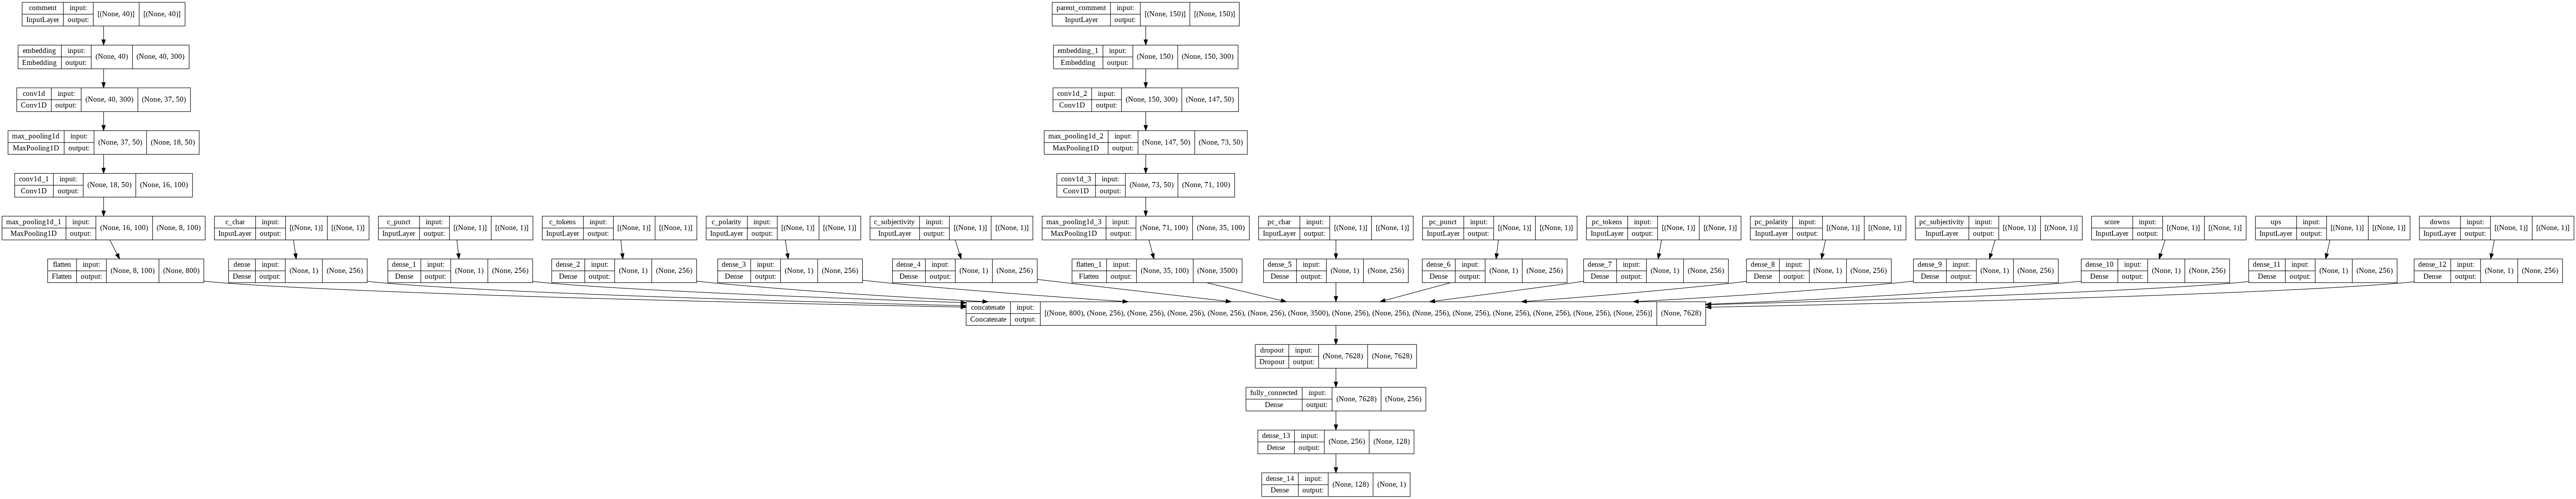

In [50]:
from tensorflow.keras.utils import plot_model

plot_model(Model_5,
           to_file = 'Model_5.png',
           show_shapes = True)

In [51]:
from tensorflow.keras.optimizers import Adam

Model_5.compile(optimizer = Adam(),
                loss      = 'binary_crossentropy',
                metrics   = ['accuracy', precision, recall, f1_score])

In [52]:
X_train_data = [X_train_c_padding, 
                X_train_c_char, X_train_c_punct, X_train_c_tokens, X_train_c_polarity, X_train_c_subjectivity,
                X_train_pc_padding, 
                X_train_pc_char, X_train_pc_punct, X_train_pc_tokens, X_train_pc_polarity, X_train_pc_subjectivity,
                X_train_score, X_train_ups, X_train_downs]

X_val_data = [X_val_c_padding, 
              X_val_c_char, X_val_c_punct, X_val_c_tokens, X_val_c_polarity, X_val_c_subjectivity,
              X_val_pc_padding, 
              X_val_pc_char, X_val_pc_punct, X_val_pc_tokens, X_val_pc_polarity, X_val_pc_subjectivity,
              X_val_score, X_val_ups, X_val_downs]

X_test_data = [X_test_c_padding, 
               X_test_c_char, X_test_c_punct, X_test_c_tokens, X_test_c_polarity, X_test_c_subjectivity,
               X_test_pc_padding, 
               X_test_pc_char, X_test_pc_punct, X_test_pc_tokens, X_test_pc_polarity, X_test_pc_subjectivity,
               X_test_score, X_test_ups, X_test_downs]

In [53]:
history_5 = Model_5.fit(x               = X_train_data, 
                        y               = y_train, 
                        batch_size      = 1024, 
                        epochs          = 50, 
                        validation_data = (X_val_data,
                                           y_val), 
                        class_weight    = class_weight_dict,
                        callbacks       = callbacks_list)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
548/548 [==============================] - 47s 67ms/step - loss: 0.5874 - accuracy: 0.6824 - precision: 0.7063 - recall: 0.6313 - f1_score: 0.6640 - val_loss: 0.5617 - val_accuracy: 0.7076 - val_precision: 0.7218 - val_recall: 0.6744 - val_f1_score: 0.6970 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999000574917021.
Epoch 2/50
548/548 [==============================] - 35s 63ms/step - loss: 0.5503 - accuracy: 0.7159 - precision: 0.7397 - recall: 0.6670 - f1_score: 0.7002 - val_loss: 0.5504 - val_accuracy: 0.7146 - val_precision: 0.7444 - val_recall: 0.6520 - val_f1_score: 0.6949 - lr: 9.9990e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000999700106714659.
Epoch 3/50
548/548 [==============================] - 35s 64ms/step - loss: 0.5317 - accuracy: 0.7306 - precision: 0.7546 - recall: 0.6854 - f1_score: 0.7168 - val_loss: 0.5478 - val_accuracy: 0.

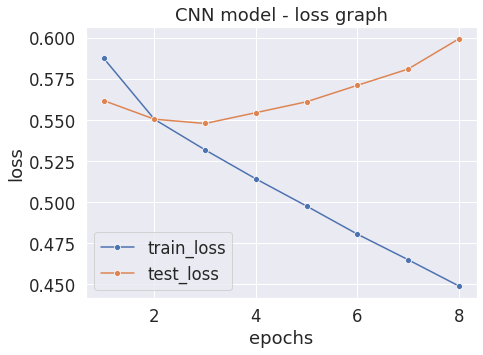

In [66]:
plot_metric(model_name = 'CNN', history = history_5, metric = 'loss')

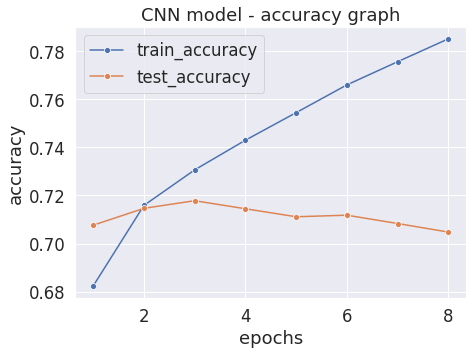

In [55]:
plot_metric(model_name = 'CNN', history = history_5, metric = 'accuracy')

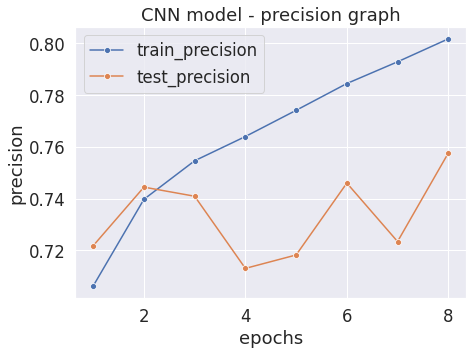

In [56]:
plot_metric(model_name = 'CNN', history = history_5, metric = 'precision')

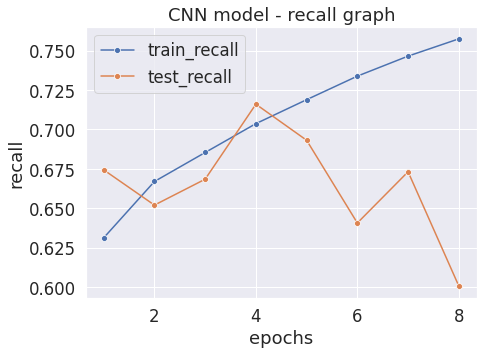

In [57]:
plot_metric(model_name = 'CNN', history = history_5, metric = 'recall')

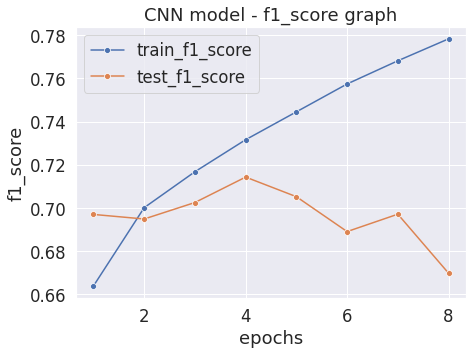

In [58]:
plot_metric(model_name = 'CNN', history = history_5, metric = 'f1_score')

In [59]:
'''save_weights'''

Model_5.save_weights('/content/drive/MyDrive/Model_13_weights.hdf5')

In [60]:
'''load_weights'''

Model_5.load_weights('/content/drive/MyDrive/Model_13_weights.hdf5')

In [61]:
l, a, p, r, f = Model_5.evaluate(X_train_data, y_train)

17535/17535 [==============================] - 106s 6ms/step - loss: 0.5055 - accuracy: 0.7522 - precision: 0.7771 - recall: 0.7059 - f1_score: 0.7332


In [62]:
l, a, p, r, f = Model_5.evaluate(X_val_data, y_val)

3758/3758 [==============================] - 22s 6ms/step - loss: 0.5478 - accuracy: 0.7178 - precision: 0.7410 - recall: 0.6686 - f1_score: 0.6959


In [63]:
l, a, p, r, f = Model_5.evaluate(X_test_data, y_test)

3758/3758 [==============================] - 22s 6ms/step - loss: 0.5505 - accuracy: 0.7149 - precision: 0.7368 - recall: 0.6668 - f1_score: 0.6928


In [64]:
# predicted value
y_pred  = Model_5.predict(X_test_data, verbose = 1)
y_pred  = np.where(y_pred > 0.5, 1, 0)
y_pred  = np.array(y_pred, dtype = int).tolist()

# true value
y_true  = y_test.tolist()

3758/3758 [==============================] - 16s 4ms/step


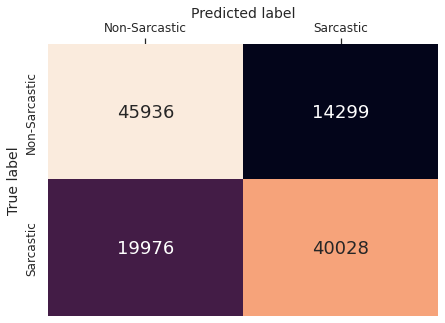

In [65]:
from sklearn.metrics import confusion_matrix

cm =  pd.DataFrame(confusion_matrix(y_true, y_pred), index = ['Non-Sarcastic','Sarcastic'], columns = ['Non-Sarcastic','Sarcastic'])
fig = plt.figure(figsize = (7, 5))

ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
ax.set_ylabel('True label', fontsize = 14)
ax.set_xlabel('Predicted label', fontsize = 14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize = 12)
plt.show()

<pre>
<font color = 'red'><h2><b>Model_8</b><font>

<pre>
Model : LSTM, Pre-trained Embedding : Fast Text, Pre-processing : with stopwords

<pre>
<font color = 'blue'><b>Text & Numerical features :</b><font>
<pre>
Same as previous model

<pre>
<font color = 'blue'><b>Model : Long Short Term Memory</b><font>

In [67]:
Model_6 = lstm_model(max_length_1 = max_length_c, vocab_size_1 = vocab_size_c, embedding_size_1 = embedding_size_c, embedding_matrix_1 = embedding_matrix_c, 
                     max_length_2 = max_length_pc, vocab_size_2 = vocab_size_pc, embedding_size_2 = embedding_size_pc, embedding_matrix_2 = embedding_matrix_pc)

In [68]:
Model_6.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comment (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 parent_comment (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 300)      40531800    ['comment[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 150, 300)     59974500    ['parent_comment[0][0]']         
                                                                                              

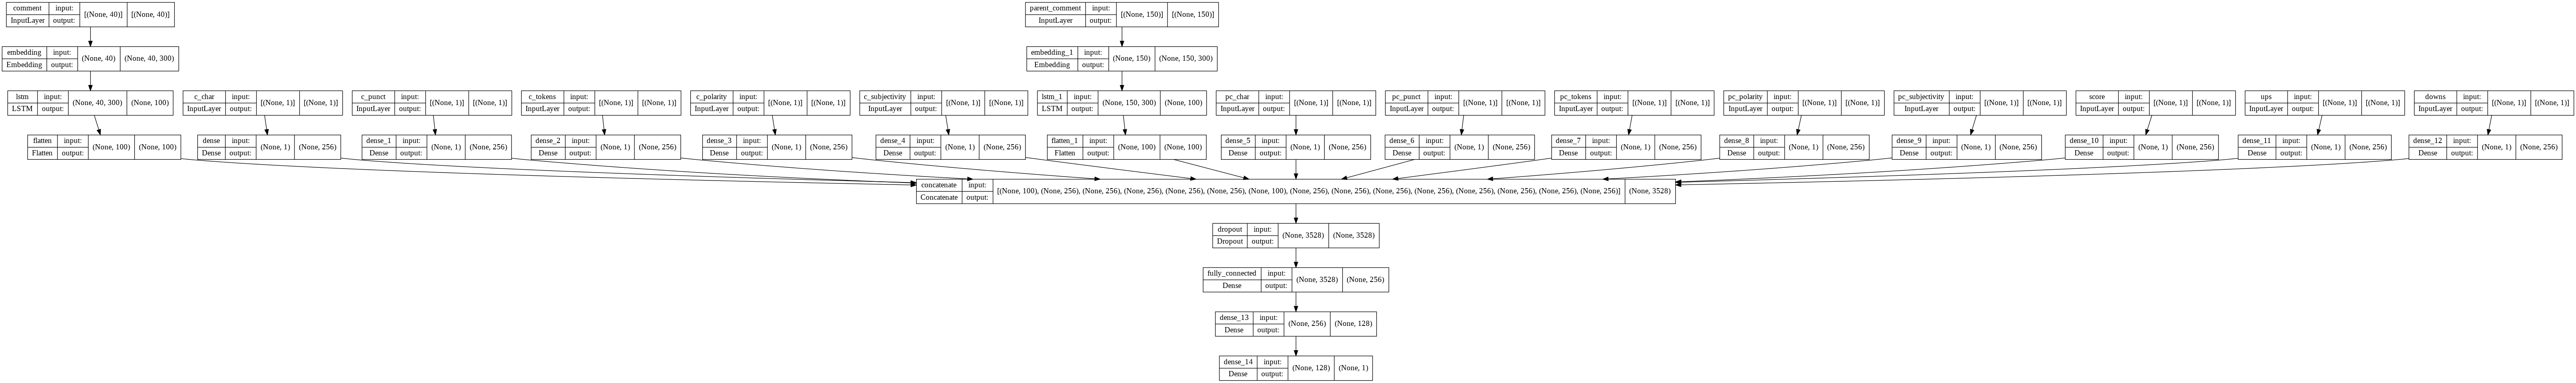

In [69]:
from tensorflow.keras.utils import plot_model

plot_model(Model_6,
           to_file = 'Model_6.png',
           show_shapes = True)

In [70]:
from tensorflow.keras.optimizers import Adam

Model_6.compile(optimizer = Adam(),
                loss      = 'binary_crossentropy',
                metrics   = ['accuracy', precision, recall, f1_score])

In [71]:
X_train_data = [X_train_c_padding, 
                X_train_c_char, X_train_c_punct, X_train_c_tokens, X_train_c_polarity, X_train_c_subjectivity,
                X_train_pc_padding, 
                X_train_pc_char, X_train_pc_punct, X_train_pc_tokens, X_train_pc_polarity, X_train_pc_subjectivity,
                X_train_score, X_train_ups, X_train_downs]

X_val_data   = [X_val_c_padding, 
                X_val_c_char, X_val_c_punct, X_val_c_tokens, X_val_c_polarity, X_val_c_subjectivity,
                X_val_pc_padding, 
                X_val_pc_char, X_val_pc_punct, X_val_pc_tokens, X_val_pc_polarity, X_val_pc_subjectivity,
                X_val_score, X_val_ups, X_val_downs]

X_test_data  = [X_test_c_padding, 
                X_test_c_char, X_test_c_punct, X_test_c_tokens, X_test_c_polarity, X_test_c_subjectivity,
                X_test_pc_padding, 
                X_test_pc_char, X_test_pc_punct, X_test_pc_tokens, X_test_pc_polarity, X_test_pc_subjectivity,
                X_test_score, X_test_ups, X_test_downs]

In [72]:
history_6 = Model_6.fit(x               = X_train_data, 
                        y               = y_train, 
                        batch_size      = 1024, 
                        epochs          = 50, 
                        validation_data = (X_val_data, 
                                           y_val), 
                        class_weight    = class_weight_dict,
                        callbacks       = callbacks_list)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
548/548 [==============================] - 59s 97ms/step - loss: 0.5852 - accuracy: 0.6856 - precision: 0.7022 - recall: 0.6504 - f1_score: 0.6727 - val_loss: 0.5561 - val_accuracy: 0.7097 - val_precision: 0.7329 - val_recall: 0.6584 - val_f1_score: 0.6934 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999000574917021.
Epoch 2/50
548/548 [==============================] - 53s 97ms/step - loss: 0.5434 - accuracy: 0.7204 - precision: 0.7416 - recall: 0.6783 - f1_score: 0.7071 - val_loss: 0.5361 - val_accuracy: 0.7254 - val_precision: 0.7694 - val_recall: 0.6423 - val_f1_score: 0.6999 - lr: 9.9990e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000999700106714659.
Epoch 3/50
548/548 [==============================] - 53s 97ms/step - loss: 0.5246 - accuracy: 0.7350 - precision: 0.7546 - recall: 0.6977 - f1_score: 0.7238 - val_loss: 0.5262 - val_accuracy: 0.

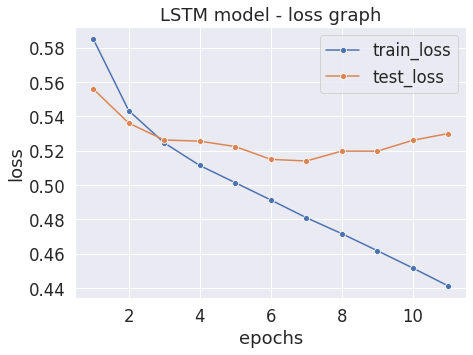

In [73]:
plot_metric(model_name = 'LSTM', history = history_6, metric = 'loss')

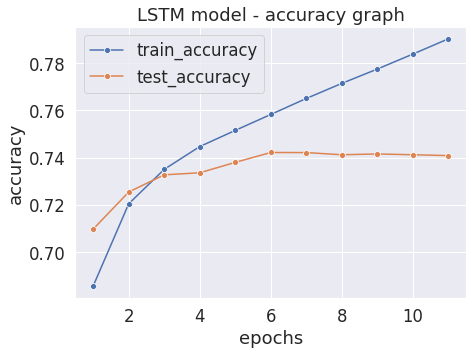

In [74]:
plot_metric(model_name = 'LSTM', history = history_6, metric = 'accuracy')

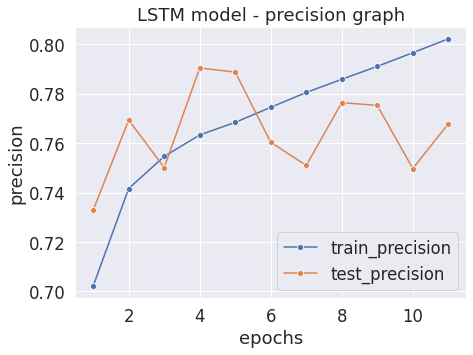

In [75]:
plot_metric(model_name = 'LSTM', history = history_6, metric = 'precision')

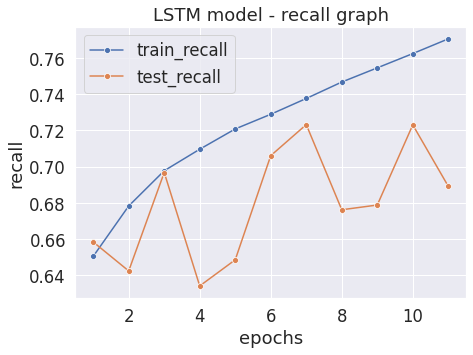

In [76]:
plot_metric(model_name = 'LSTM', history = history_6, metric = 'recall')

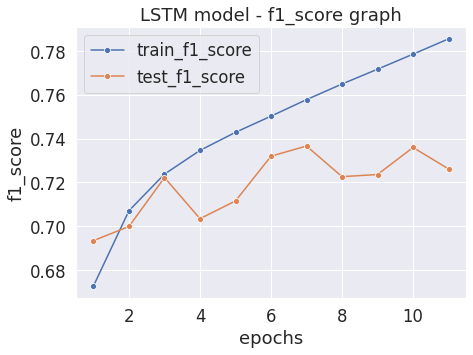

In [77]:
plot_metric(model_name = 'LSTM', history = history_6, metric = 'f1_score')

In [78]:
'''save_weights'''

Model_6.save_weights('/content/drive/MyDrive/Model_14_weights.hdf5')

In [79]:
'''load_weights'''

Model_6.load_weights('/content/drive/MyDrive/Model_14_weights.hdf5')

In [80]:
l, a, p, r, f = Model_6.evaluate(X_train_data, y_train)

17535/17535 [==============================] - 179s 10ms/step - loss: 0.4711 - accuracy: 0.7729 - precision: 0.7906 - recall: 0.7407 - f1_score: 0.7586


In [81]:
l, a, p, r, f = Model_6.evaluate(X_val_data, y_val)

3758/3758 [==============================] - 34s 9ms/step - loss: 0.5149 - accuracy: 0.7422 - precision: 0.7596 - recall: 0.7057 - f1_score: 0.7253


In [82]:
l, a, p, r, f = Model_6.evaluate(X_test_data, y_test)

3758/3758 [==============================] - 34s 9ms/step - loss: 0.5160 - accuracy: 0.7412 - precision: 0.7582 - recall: 0.7068 - f1_score: 0.7249


In [83]:
# predicted value
y_pred  = Model_6.predict(X_test_data, verbose = 1)
y_pred  = np.where(y_pred > 0.5, 1, 0)
y_pred  = np.array(y_pred, dtype = int).tolist()

# true value
y_true  = y_test.tolist()

3758/3758 [==============================] - 28s 7ms/step


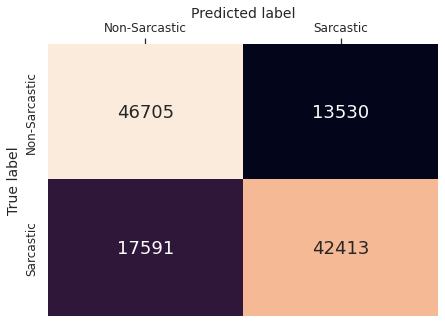

In [84]:
from sklearn.metrics import confusion_matrix

cm =  pd.DataFrame(confusion_matrix(y_true, y_pred), index = ['Non-Sarcastic','Sarcastic'], columns = ['Non-Sarcastic','Sarcastic'])
fig = plt.figure(figsize = (7, 5))

ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
ax.set_ylabel('True label', fontsize = 14)
ax.set_xlabel('Predicted label', fontsize = 14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize = 12)
plt.show()

<pre>
<font color = 'red'><h2><b>Model_9</b><font>

<pre>
Model : CNN, Pre-trained Embedding : Fast Text, Pre-processing : without stopwords

<pre>
<font color = 'blue'><b>Text feature : pre_stop_comment</b><font>

In [85]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_length
max_length_c = 40

# tokenizer
tokenizer_c = Tokenizer(num_words = 50000, oov_token = '<unk>')

# fit has to happen only on train data
tokenizer_c.fit_on_texts(X_train['pre_stop_comment'].values)

# texts_to_sequences
X_train_c_sequences    = tokenizer_c.texts_to_sequences(X_train['pre_stop_comment'].values)
X_train_c_stop_padding = pad_sequences(X_train_c_sequences, maxlen = max_length_c)

X_val_c_sequences      = tokenizer_c.texts_to_sequences(X_val['pre_stop_comment'].values)
X_val_c_stop_padding   = pad_sequences(X_val_c_sequences, maxlen = max_length_c)

X_test_c_sequences     = tokenizer_c.texts_to_sequences(X_test['pre_stop_comment'].values)
X_test_c_stop_padding  = pad_sequences(X_test_c_sequences, maxlen = max_length_c)


# shape
print('After_padding :')
print('\nX_train : ', X_train_c_stop_padding.shape)
print('X_val   : ', X_val_c_stop_padding.shape)
print('X_test  : ', X_test_c_stop_padding.shape)
print()
print('='* 110)

#
vocab_size_c = tokenizer_c.word_index
print('\nVocab_size "comment" :', len(vocab_size_c))

###############################################[embedding_matrix]###################################################

#
embedding_size_c = 300

# create a weight matrix for words in training docs
embedding_matrix_c = np.zeros((len(vocab_size_c) + 1, embedding_size_c))

for word, i in tokenizer_c.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_c[i] = embedding_vector

print('\nEmbedding_matrix_shape :', embedding_matrix_c.shape)

After_padding :

X_train :  (561110, 40)
X_val   :  (120238, 40)
X_test  :  (120239, 40)


Vocab_size "comment" : 135102

Embedding_matrix_shape : (135103, 300)


<pre>
<font color = 'blue'><b>Numerical comment features : c_char, c_punct, c_tokens, c_polarity, c_subjectivity</b><font>

In [21]:
###########################################[feature : "c_char"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_char'].values.reshape(-1, 1))

# transform
X_train_c_char = Standard_Scaler.transform(X_train['c_char'].values.reshape(-1, 1))
X_val_c_char   = Standard_Scaler.transform(X_val['c_char'].values.reshape(-1, 1))
X_test_c_char  = Standard_Scaler.transform(X_test['c_char'].values.reshape(-1, 1))

# shape
print('X_train_c_char         : ', X_train_c_char.shape)
print('X_val_c_char           : ', X_val_c_char.shape)
print('X_test_c_char          : ', X_test_c_char.shape)

##########################################[feature : "c_punct"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_punct'].values.reshape(-1, 1))

# transform
X_train_c_punct = Standard_Scaler.transform(X_train['c_punct'].values.reshape(-1, 1))
X_val_c_punct   = Standard_Scaler.transform(X_val['c_punct'].values.reshape(-1, 1))
X_test_c_punct  = Standard_Scaler.transform(X_test['c_punct'].values.reshape(-1, 1))

# shape
print('\nX_train_c_punct        : ', X_train_c_punct.shape)
print('X_val_c_punct          : ', X_val_c_punct.shape)
print('X_test_c_punct         : ', X_test_c_punct.shape)

#########################################[feature : "c_tokens"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_tokens'].values.reshape(-1, 1))

# transform
X_train_c_tokens = Standard_Scaler.transform(X_train['c_tokens'].values.reshape(-1, 1))
X_val_c_tokens   = Standard_Scaler.transform(X_val['c_tokens'].values.reshape(-1, 1))
X_test_c_tokens  = Standard_Scaler.transform(X_test['c_tokens'].values.reshape(-1, 1))

# shape
print('\nX_train_c_tokens       : ', X_train_c_tokens.shape)
print('X_val_c_tokens         : ', X_val_c_tokens.shape)
print('X_test_c_tokens        : ', X_test_c_tokens.shape)

#######################################[feature : "c_polarity"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_polarity'].values.reshape(-1, 1))

# transform
X_train_c_polarity = Standard_Scaler.transform(X_train['c_polarity'].values.reshape(-1, 1))
X_val_c_polarity   = Standard_Scaler.transform(X_val['c_polarity'].values.reshape(-1, 1))
X_test_c_polarity  = Standard_Scaler.transform(X_test['c_polarity'].values.reshape(-1, 1))

# shape
print('\nX_train_c_polarity     : ', X_train_c_polarity.shape)
print('X_val_c_polarity       : ', X_val_c_polarity.shape)
print('X_test_c_polarity      : ', X_test_c_polarity.shape)

###################################[feature : "c_subjectivity"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['c_subjectivity'].values.reshape(-1, 1))

# transform
X_train_c_subjectivity = Standard_Scaler.transform(X_train['c_subjectivity'].values.reshape(-1, 1))
X_val_c_subjectivity   = Standard_Scaler.transform(X_val['c_subjectivity'].values.reshape(-1, 1))
X_test_c_subjectivity  = Standard_Scaler.transform(X_test['c_subjectivity'].values.reshape(-1, 1))

# shape
print('\nX_train_c_subjectivity : ', X_train_c_subjectivity.shape)
print('X_val_c_subjectivity   : ', X_val_c_subjectivity.shape)
print('X_test_c_subjectivity  : ', X_test_c_subjectivity.shape)

X_train_c_char         :  (561110, 1)
X_val_c_char           :  (120238, 1)
X_test_c_char          :  (120239, 1)

X_train_c_punct        :  (561110, 1)
X_val_c_punct          :  (120238, 1)
X_test_c_punct         :  (120239, 1)

X_train_c_tokens       :  (561110, 1)
X_val_c_tokens         :  (120238, 1)
X_test_c_tokens        :  (120239, 1)

X_train_c_polarity     :  (561110, 1)
X_val_c_polarity       :  (120238, 1)
X_test_c_polarity      :  (120239, 1)

X_train_c_subjectivity :  (561110, 1)
X_val_c_subjectivity   :  (120238, 1)
X_test_c_subjectivity  :  (120239, 1)


<pre>
<font color = 'blue'><b>Text feature : pre_stop_parent_comment</b><font>

In [86]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_length
max_length_pc = 150

# tokenizer
tokenizer_pc = Tokenizer(num_words = 50000, oov_token = '<unk>')

# fit has to happen only on train data
tokenizer_pc.fit_on_texts(X_train['pre_stop_parent_comment'].values)

# texts_to_sequences
X_train_pc_sequences = tokenizer_pc.texts_to_sequences(X_train['pre_stop_parent_comment'].values)
X_train_pc_stop_padding   = pad_sequences(X_train_pc_sequences, maxlen = max_length_pc)

X_val_pc_sequences   = tokenizer_pc.texts_to_sequences(X_val['pre_stop_parent_comment'].values)
X_val_pc_stop_padding     = pad_sequences(X_val_pc_sequences, maxlen = max_length_pc)

X_test_pc_sequences  = tokenizer_pc.texts_to_sequences(X_test['pre_stop_parent_comment'].values)
X_test_pc_stop_padding    = pad_sequences(X_test_pc_sequences, maxlen = max_length_pc)


# shape
print('After_padding :')
print('\nX_train : ', X_train_pc_stop_padding.shape)
print('X_val   : ', X_val_pc_stop_padding.shape)
print('X_test  : ', X_test_pc_stop_padding.shape)
print()
print('='* 110)

#
vocab_size_pc = tokenizer_pc.word_index
print('\nVocab_size "parent_comment" :', len(vocab_size_pc))

###############################################[embedding_matrix]###################################################

#
embedding_size_pc = 300

# create a weight matrix for words in training docs
embedding_matrix_pc = np.zeros((len(vocab_size_pc) + 1, embedding_size_pc))

for word, i in tokenizer_pc.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_pc[i] = embedding_vector

print('\nEmbedding_matrix_shape :', embedding_matrix_pc.shape)

After_padding :

X_train :  (561110, 150)
X_val   :  (120238, 150)
X_test  :  (120239, 150)


Vocab_size "parent_comment" : 199910

Embedding_matrix_shape : (199911, 300)


<pre>
<font color = 'blue'><b>Numerical parent_comment features : pc_char, pc_punct, pc_tokens, pc_polarity, pc_subjectivity</b><font>

In [22]:
###########################################[feature : "pc_char"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_char'].values.reshape(-1, 1))

# transform
X_train_pc_char = Standard_Scaler.transform(X_train['pc_char'].values.reshape(-1, 1))
X_val_pc_char   = Standard_Scaler.transform(X_val['pc_char'].values.reshape(-1, 1))
X_test_pc_char  = Standard_Scaler.transform(X_test['pc_char'].values.reshape(-1, 1))

# shape
print('X_train_pc_char         : ', X_train_pc_char.shape)
print('X_val_pc_char           : ', X_val_pc_char.shape)
print('X_test_pc_char          : ', X_test_pc_char.shape)

##########################################[feature : "pc_punct"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_punct'].values.reshape(-1, 1))

# transform
X_train_pc_punct = Standard_Scaler.transform(X_train['pc_punct'].values.reshape(-1, 1))
X_val_pc_punct   = Standard_Scaler.transform(X_val['pc_punct'].values.reshape(-1, 1))
X_test_pc_punct  = Standard_Scaler.transform(X_test['pc_punct'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_punct        : ', X_train_pc_punct.shape)
print('X_val_pc_punct          : ', X_val_pc_punct.shape)
print('X_test_pc_punct         : ', X_test_pc_punct.shape)

#########################################[feature : "pc_tokens"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_tokens'].values.reshape(-1, 1))

# transform
X_train_pc_tokens = Standard_Scaler.transform(X_train['pc_tokens'].values.reshape(-1, 1))
X_val_pc_tokens   = Standard_Scaler.transform(X_val['pc_tokens'].values.reshape(-1, 1))
X_test_pc_tokens  = Standard_Scaler.transform(X_test['pc_tokens'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_tokens       : ', X_train_pc_tokens.shape)
print('X_val_pc_tokens         : ', X_val_pc_tokens.shape)
print('X_test_pc_tokens        : ', X_test_pc_tokens.shape)

#######################################[feature : "pc_polarity"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_polarity'].values.reshape(-1, 1))

# transform
X_train_pc_polarity = Standard_Scaler.transform(X_train['pc_polarity'].values.reshape(-1, 1))
X_val_pc_polarity   = Standard_Scaler.transform(X_val['pc_polarity'].values.reshape(-1, 1))
X_test_pc_polarity  = Standard_Scaler.transform(X_test['pc_polarity'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_polarity     : ', X_train_pc_polarity.shape)
print('X_val_pc_polarity       : ', X_val_pc_polarity.shape)
print('X_test_pc_polarity      : ', X_test_pc_polarity.shape)

###################################[feature : "pc_subjectivity"]###################################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['pc_subjectivity'].values.reshape(-1, 1))

# transform
X_train_pc_subjectivity = Standard_Scaler.transform(X_train['pc_subjectivity'].values.reshape(-1, 1))
X_val_pc_subjectivity   = Standard_Scaler.transform(X_val['pc_subjectivity'].values.reshape(-1, 1))
X_test_pc_subjectivity  = Standard_Scaler.transform(X_test['pc_subjectivity'].values.reshape(-1, 1))

# shape
print('\nX_train_pc_subjectivity : ', X_train_pc_subjectivity.shape)
print('X_val_pc_subjectivity   : ', X_val_pc_subjectivity.shape)
print('X_test_pc_subjectivity  : ', X_test_pc_subjectivity.shape)

X_train_pc_char         :  (561110, 1)
X_val_pc_char           :  (120238, 1)
X_test_pc_char          :  (120239, 1)

X_train_pc_punct        :  (561110, 1)
X_val_pc_punct          :  (120238, 1)
X_test_pc_punct         :  (120239, 1)

X_train_pc_tokens       :  (561110, 1)
X_val_pc_tokens         :  (120238, 1)
X_test_pc_tokens        :  (120239, 1)

X_train_pc_polarity     :  (561110, 1)
X_val_pc_polarity       :  (120238, 1)
X_test_pc_polarity      :  (120239, 1)

X_train_pc_subjectivity :  (561110, 1)
X_val_pc_subjectivity   :  (120238, 1)
X_test_pc_subjectivity  :  (120239, 1)


<pre>
<font color = 'blue'><b>Numerical features : score, ups, downs</b><font>

In [14]:
########################################[feature : "score"]#############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['score'].values.reshape(-1, 1))

# transform
X_train_score = Standard_Scaler.transform(X_train['score'].values.reshape(-1, 1))
X_val_score   = Standard_Scaler.transform(X_val['score'].values.reshape(-1, 1))
X_test_score  = Standard_Scaler.transform(X_test['score'].values.reshape(-1, 1))

# shape
print('X_train_score : ', X_train_score.shape)
print('X_val_score   : ', X_val_score.shape)
print('X_test_score  : ', X_test_score.shape)

########################################[feature : "ups"]##############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['ups'].values.reshape(-1, 1))

# transform
X_train_ups = Standard_Scaler.transform(X_train['ups'].values.reshape(-1, 1))
X_val_ups   = Standard_Scaler.transform(X_val['ups'].values.reshape(-1, 1))
X_test_ups  = Standard_Scaler.transform(X_test['ups'].values.reshape(-1, 1))

# shape
print('\nX_train_ups   : ', X_train_ups.shape)
print('X_val_ups     : ', X_val_ups.shape)
print('X_test_ups    : ', X_test_ups.shape)

########################################[feature : "downs"]#############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['downs'].values.reshape(-1, 1))

# transform
X_train_downs = Standard_Scaler.transform(X_train['downs'].values.reshape(-1, 1))
X_val_downs   = Standard_Scaler.transform(X_val['downs'].values.reshape(-1, 1))
X_test_downs  = Standard_Scaler.transform(X_test['downs'].values.reshape(-1, 1))

# shape
print('\nX_train_downs : ', X_train_downs.shape)
print('X_val_downs   : ', X_val_downs.shape)
print('X_test_downs  : ', X_test_downs.shape)

X_train_score :  (561110, 1)
X_val_score   :  (120238, 1)
X_test_score  :  (120239, 1)

X_train_ups   :  (561110, 1)
X_val_ups     :  (120238, 1)
X_test_ups    :  (120239, 1)

X_train_downs :  (561110, 1)
X_val_downs   :  (120238, 1)
X_test_downs  :  (120239, 1)


<pre>
<font color = 'blue'><b>Model : Convolutional Neural Network</b><font>

In [88]:
Model_7 = cnn_model(max_length_1 = max_length_c, vocab_size_1 = vocab_size_c, embedding_size_1 = embedding_size_c, embedding_matrix_1 = embedding_matrix_c, 
                     max_length_2 = max_length_pc, vocab_size_2 = vocab_size_pc, embedding_size_2 = embedding_size_pc, embedding_matrix_2 = embedding_matrix_pc)

In [89]:
Model_7.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comment (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 parent_comment (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 300)      40530900    ['comment[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 150, 300)     59973300    ['parent_comment[0][0]']         
                                                                                              

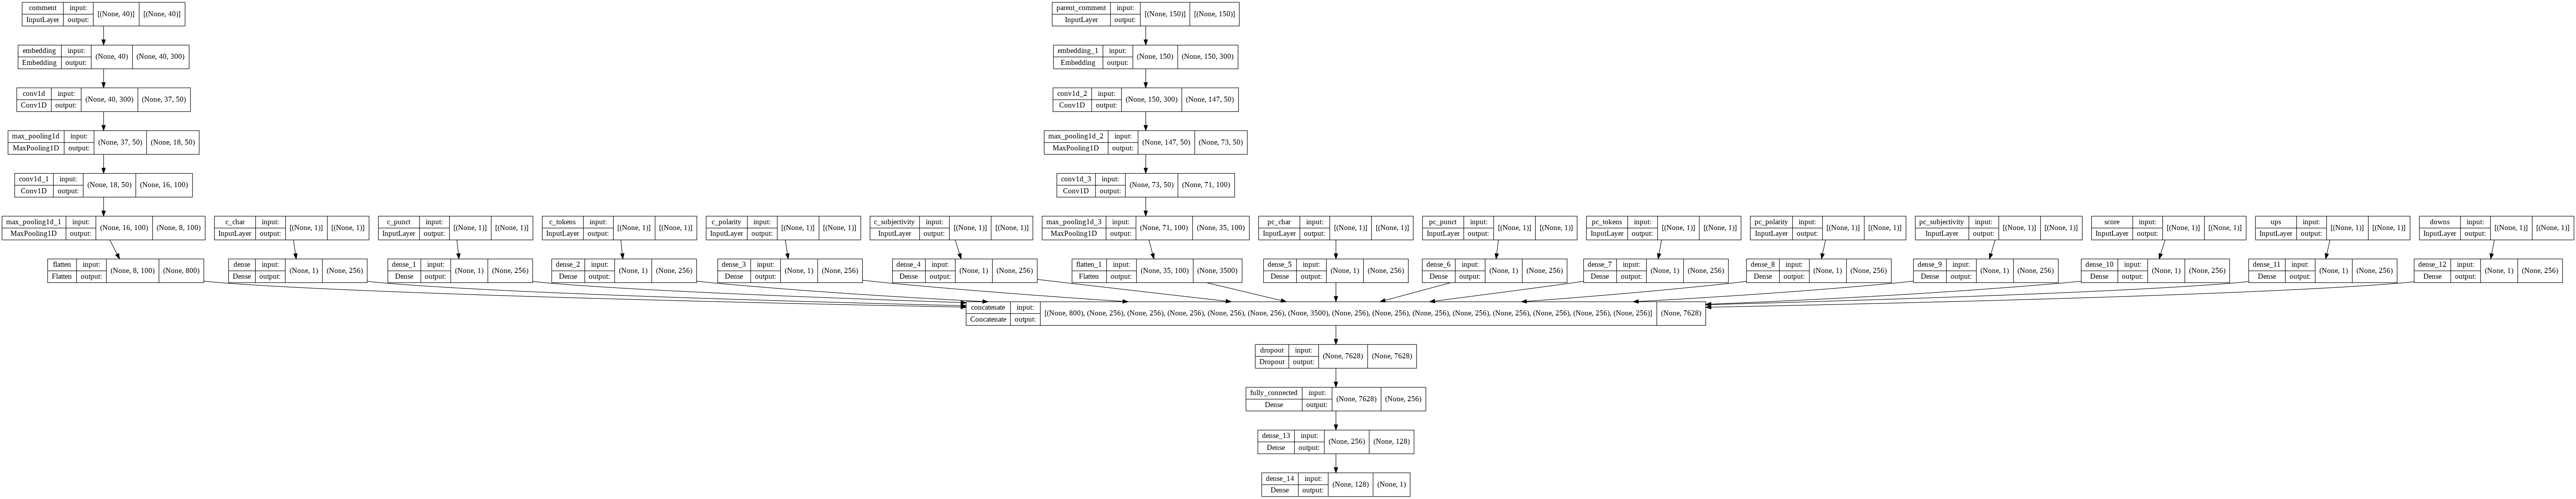

In [90]:
from tensorflow.keras.utils import plot_model

plot_model(Model_7,
           to_file = 'Model_7.png',
           show_shapes = True)

In [91]:
from tensorflow.keras.optimizers import Adam

Model_7.compile(optimizer = Adam(),
                loss      = 'binary_crossentropy',
                metrics   = ['accuracy', precision, recall, f1_score])

In [92]:
X_train_data = [X_train_c_stop_padding, 
                X_train_c_char, X_train_c_punct, X_train_c_tokens, X_train_c_polarity, X_train_c_subjectivity,
                X_train_pc_stop_padding, 
                X_train_pc_char, X_train_pc_punct, X_train_pc_tokens, X_train_pc_polarity, X_train_pc_subjectivity,
                X_train_score, X_train_ups, X_train_downs]

X_val_data   = [X_val_c_stop_padding, 
                X_val_c_char, X_val_c_punct, X_val_c_tokens, X_val_c_polarity, X_val_c_subjectivity,
                X_val_pc_stop_padding, 
                X_val_pc_char, X_val_pc_punct, X_val_pc_tokens, X_val_pc_polarity, X_val_pc_subjectivity,
                X_val_score, X_val_ups, X_val_downs]

X_test_data  = [X_test_c_stop_padding, 
                X_test_c_char, X_test_c_punct, X_test_c_tokens, X_test_c_polarity, X_test_c_subjectivity,
                X_test_pc_stop_padding, 
                X_test_pc_char, X_test_pc_punct, X_test_pc_tokens, X_test_pc_polarity, X_test_pc_subjectivity,
                X_test_score, X_test_ups, X_test_downs]

In [93]:
history_7 = Model_7.fit(x               = X_train_data, 
                        y               = y_train, 
                        batch_size      = 1024, 
                        epochs          = 50, 
                        validation_data = (X_val_data, 
                                           y_val), 
                        class_weight    = class_weight_dict,
                        callbacks       = callbacks_list)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
548/548 [==============================] - 39s 64ms/step - loss: 0.6156 - accuracy: 0.6549 - precision: 0.6733 - recall: 0.6071 - f1_score: 0.6359 - val_loss: 0.5961 - val_accuracy: 0.6744 - val_precision: 0.6795 - val_recall: 0.6575 - val_f1_score: 0.6681 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999000574917021.
Epoch 2/50
548/548 [==============================] - 34s 62ms/step - loss: 0.5849 - accuracy: 0.6859 - precision: 0.7051 - recall: 0.6397 - f1_score: 0.6695 - val_loss: 0.5884 - val_accuracy: 0.6823 - val_precision: 0.7140 - val_recall: 0.6055 - val_f1_score: 0.6551 - lr: 9.9990e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000999700106714659.
Epoch 3/50
548/548 [==============================] - 34s 62ms/step - loss: 0.5673 - accuracy: 0.7011 - precision: 0.7196 - recall: 0.6597 - f1_score: 0.6872 - val_loss: 0.5883 - val_accuracy: 0.

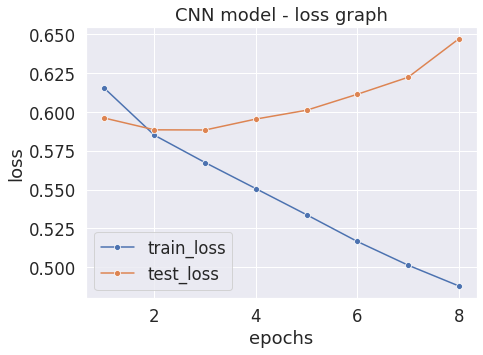

In [94]:
plot_metric(model_name = 'CNN', history = history_7, metric = 'loss')

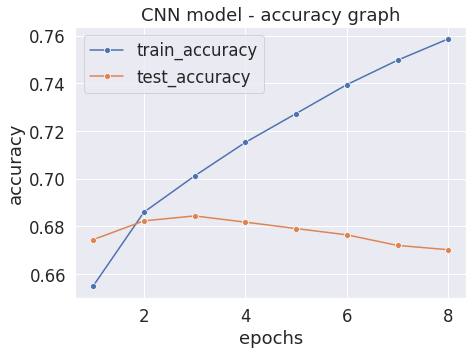

In [95]:
plot_metric(model_name = 'CNN', history = history_7, metric = 'accuracy')

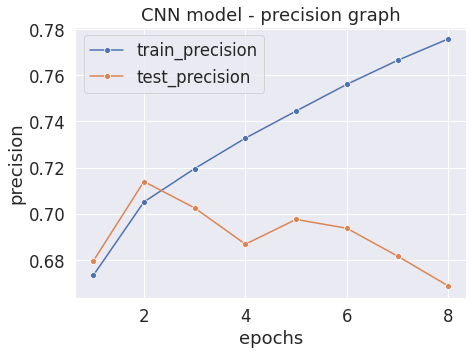

In [96]:
plot_metric(model_name = 'CNN', history = history_7, metric = 'precision')

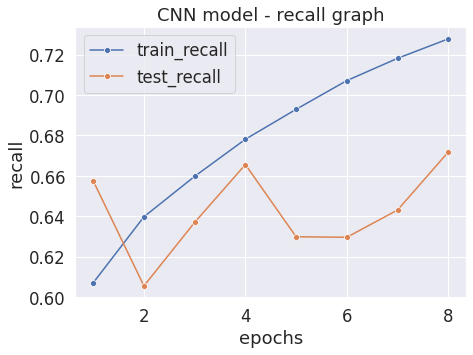

In [97]:
plot_metric(model_name = 'CNN', history = history_7, metric = 'recall')

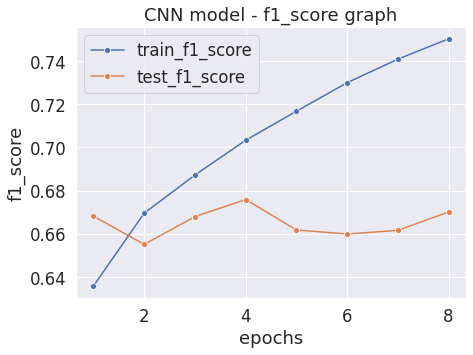

In [98]:
plot_metric(model_name = 'CNN', history = history_7, metric = 'f1_score')

In [99]:
'''save_weights'''

Model_7.save_weights('/content/drive/MyDrive/Model_15_weights.hdf5')

In [100]:
'''load_weights'''

Model_7.load_weights('/content/drive/MyDrive/Model_15_weights.hdf5')

In [101]:
l, a, p, r, f = Model_7.evaluate(X_train_data, y_train)

17535/17535 [==============================] - 125s 7ms/step - loss: 0.5390 - accuracy: 0.7261 - precision: 0.7481 - recall: 0.6796 - f1_score: 0.7052


In [102]:
l, a, p, r, f = Model_7.evaluate(X_val_data, y_val)

3758/3758 [==============================] - 23s 6ms/step - loss: 0.5883 - accuracy: 0.6843 - precision: 0.7024 - recall: 0.6373 - f1_score: 0.6609


In [103]:
l, a, p, r, f = Model_7.evaluate(X_test_data, y_test)

3758/3758 [==============================] - 28s 7ms/step - loss: 0.5900 - accuracy: 0.6811 - precision: 0.6984 - recall: 0.6343 - f1_score: 0.6576


In [104]:
# predicted value
y_pred  = Model_7.predict(X_test_data, verbose = 1)
y_pred  = np.where(y_pred > 0.5, 1, 0)
y_pred  = np.array(y_pred, dtype = int).tolist()

# true value
y_true  = y_test.tolist()

3758/3758 [==============================] - 16s 4ms/step


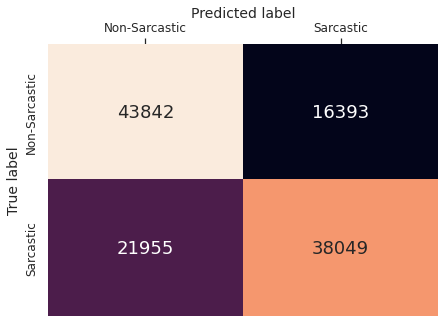

In [105]:
from sklearn.metrics import confusion_matrix

cm  = pd.DataFrame(confusion_matrix(y_true, y_pred), index = ['Non-Sarcastic','Sarcastic'], columns = ['Non-Sarcastic','Sarcastic'])
fig = plt.figure(figsize = (7, 5))

ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
ax.set_ylabel('True label', fontsize = 14)
ax.set_xlabel('Predicted label', fontsize = 14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize = 12)
plt.show()

<pre>
<font color = 'red'><h2><b>Model_10</b><font>

<pre>
Model : LSTM, Pre-trained Embedding : Fast Text, Pre-processing : without stopwords

<pre>
<font color = 'blue'><b>Text & Numerical features :</b><font>
<pre>
Same as previous model

<pre>
<font color = 'blue'><b>Model : Long Short Term Memory</b><font>

In [106]:
Model_8 = lstm_model(max_length_1 = max_length_c, vocab_size_1 = vocab_size_c, embedding_size_1 = embedding_size_c, embedding_matrix_1 = embedding_matrix_c, 
                     max_length_2 = max_length_pc, vocab_size_2 = vocab_size_pc, embedding_size_2 = embedding_size_pc, embedding_matrix_2 = embedding_matrix_pc)

In [107]:
Model_8.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comment (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 parent_comment (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 300)      40530900    ['comment[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 150, 300)     59973300    ['parent_comment[0][0]']         
                                                                                              

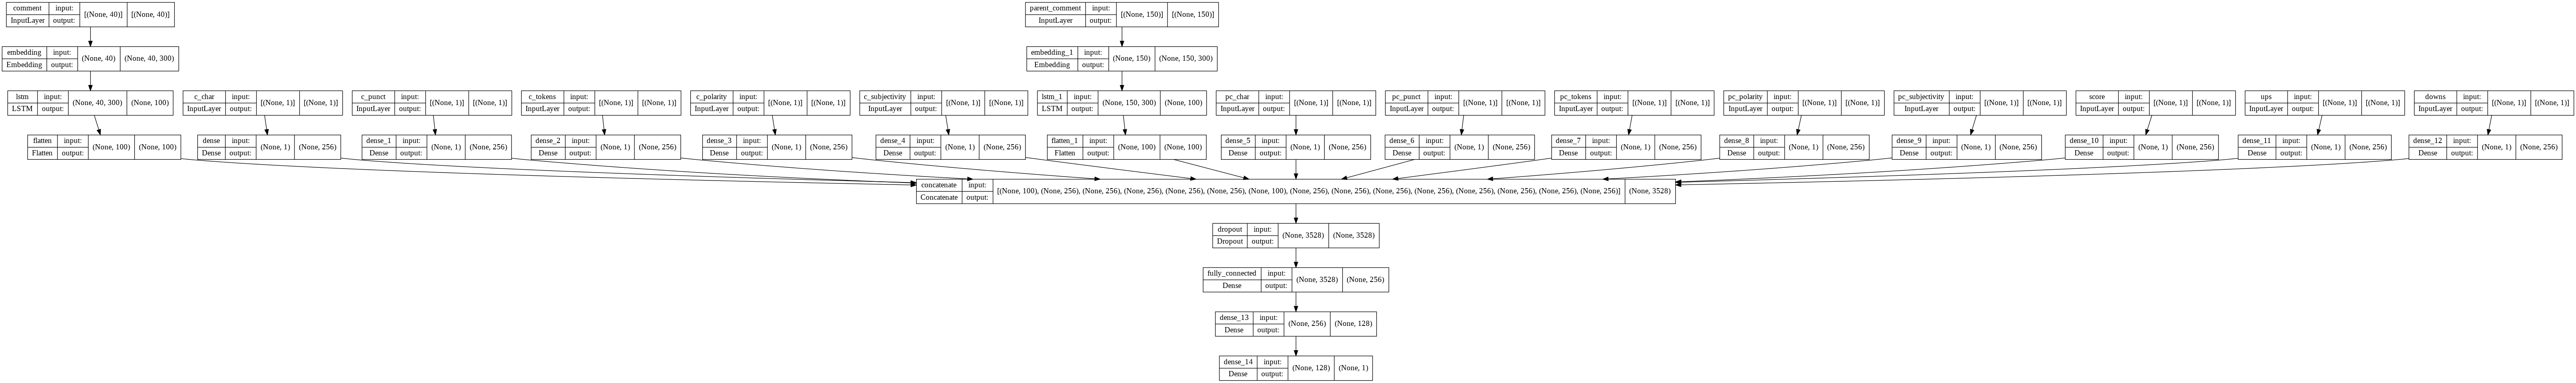

In [108]:
from tensorflow.keras.utils import plot_model

plot_model(Model_8,
           to_file = 'Model_8.png',
           show_shapes = True)

In [109]:
from tensorflow.keras.optimizers import Adam

Model_8.compile(optimizer = Adam(),
                loss      = 'binary_crossentropy',
                metrics   = ['accuracy', precision, recall, f1_score])

In [110]:
history_8 = Model_8.fit(x               = X_train_data, 
                        y               = y_train, 
                        batch_size      = 1024, 
                        epochs          = 50, 
                        validation_data = (X_val_data, 
                                           y_val), 
                        class_weight    = class_weight_dict,
                        callbacks       = callbacks_list)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
548/548 [==============================] - 58s 95ms/step - loss: 0.5989 - accuracy: 0.6714 - precision: 0.6876 - recall: 0.6318 - f1_score: 0.6565 - val_loss: 0.5740 - val_accuracy: 0.6952 - val_precision: 0.7015 - val_recall: 0.6782 - val_f1_score: 0.6894 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999000574917021.
Epoch 2/50
548/548 [==============================] - 51s 93ms/step - loss: 0.5630 - accuracy: 0.7042 - precision: 0.7221 - recall: 0.6644 - f1_score: 0.6910 - val_loss: 0.5595 - val_accuracy: 0.7054 - val_precision: 0.7310 - val_recall: 0.6480 - val_f1_score: 0.6868 - lr: 9.9990e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000999700106714659.
Epoch 3/50
548/548 [==============================] - 51s 94ms/step - loss: 0.5486 - accuracy: 0.7160 - precision: 0.7333 - recall: 0.6791 - f1_score: 0.7042 - val_loss: 0.5532 - val_accuracy: 0.

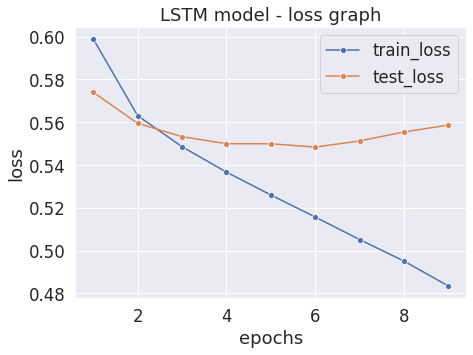

In [111]:
plot_metric(model_name = 'LSTM', history = history_8, metric = 'loss')

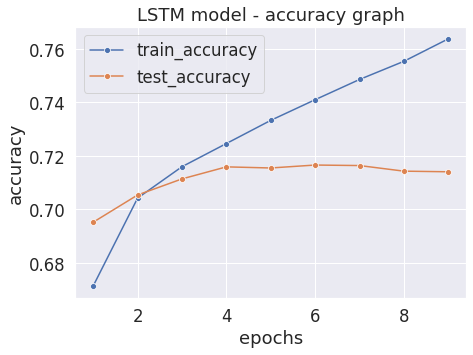

In [112]:
plot_metric(model_name = 'LSTM', history = history_8, metric = 'accuracy')

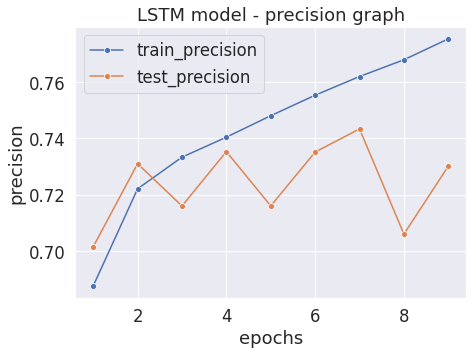

In [113]:
plot_metric(model_name = 'LSTM', history = history_8, metric = 'precision')

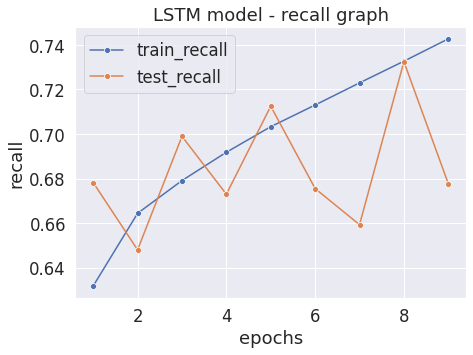

In [114]:
plot_metric(model_name = 'LSTM', history = history_8, metric = 'recall')

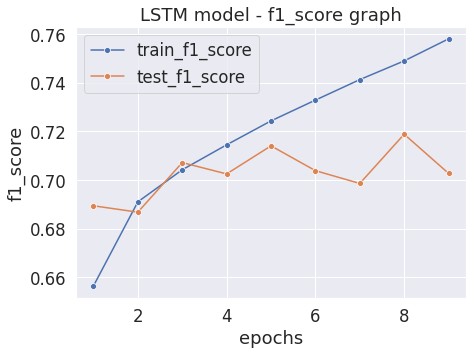

In [115]:
plot_metric(model_name = 'LSTM', history = history_8, metric = 'f1_score')

In [116]:
'''save_weights'''

Model_8.save_weights('/content/drive/MyDrive/Model_16_weights.hdf5')

In [117]:
'''load_weights'''

Model_8.load_weights('/content/drive/MyDrive/Model_16_weights.hdf5')

In [118]:
l, a, p, r, f = Model_8.evaluate(X_train_data, y_train)

17535/17535 [==============================] - 187s 11ms/step - loss: 0.5200 - accuracy: 0.7379 - precision: 0.7571 - recall: 0.6984 - f1_score: 0.7198


In [119]:
l, a, p, r, f = Model_8.evaluate(X_val_data, y_val)

3758/3758 [==============================] - 33s 9ms/step - loss: 0.5499 - accuracy: 0.7159 - precision: 0.7349 - recall: 0.6726 - f1_score: 0.6955


In [120]:
l, a, p, r, f = Model_8.evaluate(X_test_data, y_test)

3758/3758 [==============================] - 34s 9ms/step - loss: 0.5501 - accuracy: 0.7148 - precision: 0.7331 - recall: 0.6737 - f1_score: 0.6952


In [121]:
# predicted value
y_pred  = Model_8.predict(X_test_data, verbose = 1)
y_pred  = np.where(y_pred > 0.5, 1, 0)
y_pred  = np.array(y_pred, dtype = int).tolist()

# true value
y_true  = y_test.tolist()

3758/3758 [==============================] - 28s 7ms/step


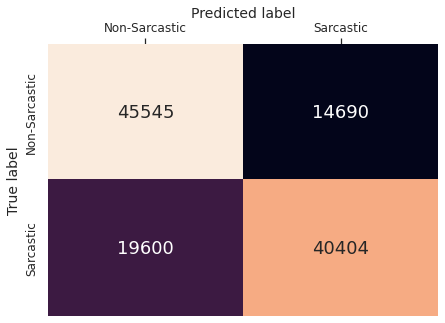

In [122]:
from sklearn.metrics import confusion_matrix

cm =  pd.DataFrame(confusion_matrix(y_true, y_pred), index = ['Non-Sarcastic','Sarcastic'], columns = ['Non-Sarcastic','Sarcastic'])
fig = plt.figure(figsize = (7, 5))

ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
ax.set_ylabel('True label', fontsize = 14)
ax.set_xlabel('Predicted label', fontsize = 14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize = 12)
plt.show()

<pre>
<font color = 'red'><h2><b>prettytable</b><font>

In [1]:
from prettytable import PrettyTable

#
table = PrettyTable()

table.field_names  = ['Model', 'Pre-Processing', 'Pre-Trained Embedding', 'Train_accuracy', 'Test_accuracy']

table.add_row(['Logistic Regression', '(with stopwords)', 'TF-IDF', 0.7794, 0.7173])
table.add_row(['Logistic Regression', '(without stopwords)', 'TF-IDF', 0.7586, 0.6907])
table.add_row(['Convolutional Neural Network', '(with stopwords)', 'Global Vectors', 0.7498, 0.7099])
table.add_row(['Long Short Term Memory', '(with stopwords)', 'Global Vectors', 0.7844, 0.7392])
table.add_row(['Convolutional Neural Network', '(without stopwords)', 'Global Vectors', 0.7278, 0.6794])
table.add_row(['Long Short Term Memory ', '(without stopwords)', 'Global Vectors', 0.7410, 0.7116])
table.add_row(['Convolutional Neural Network ', '(with stopwords)', 'FastText', 0.7522, 0.7149])
table.add_row(['Long Short Term Memory ', '(with stopwords)', 'FastText', 0.7729, 0.7412])
table.add_row(['Convolutional Neural Network ', '(without stopwords)', 'FastText', 0.7261, 0.6811])
table.add_row(['Long Short Term Memory ', '(without stopwords)', 'FastText', 0.7379, 0.7148])

print(table)

+-------------------------------+---------------------+-----------------------+----------------+---------------+
|             Model             |    Pre-Processing   | Pre-Trained Embedding | Train_accuracy | Test_accuracy |
+-------------------------------+---------------------+-----------------------+----------------+---------------+
|      Logistic Regression      |   (with stopwords)  |         TF-IDF        |     0.7794     |     0.7173    |
|      Logistic Regression      | (without stopwords) |         TF-IDF        |     0.7586     |     0.6907    |
|  Convolutional Neural Network |   (with stopwords)  |     Global Vectors    |     0.7498     |     0.7099    |
|     Long Short Term Memory    |   (with stopwords)  |     Global Vectors    |     0.7844     |     0.7392    |
|  Convolutional Neural Network | (without stopwords) |     Global Vectors    |     0.7278     |     0.6794    |
|    Long Short Term Memory     | (without stopwords) |     Global Vectors    |     0.741      |

<pre>
Out of all the models, LSTM with stopwords and fastTEXT embedding turned out to be the best model giving 0.7412 accuracy